# <div align="center" style="color: #ff5733;">CIC Data Creation First Extension</div>

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv(r"D:\OneDrive - Tonik Financial Pte Ltd\MyStuff\Data Science\Gaurav Mandolia\CIC Data Analysis\cicdata_20240226.csv")
df.shape

(98097, 495)

# OverduePaymentsNumber

In [4]:
a = 'OverduePaymentsNumber'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a}
-- date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 7cd4ce09-d6e7-4490-b749-a03c6da8e507 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [5]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OverduePaymentsNumber
87784,1929065,a19104ea-b649-4491-8af9-14880ee27159,A01780108,2023-03-05,Granted,0
401612,2077534,f2d3ba5b-7d44-4438-b944-63d817398bfe,E03763316,2023-07-05,Granted,0
460478,1101298,78ae462c-42d5-4faa-9733-59230bbfd0e4,C04352159,2024-01-27,Granted,3
100595,2272674,edcbcd17-5a0e-4ca2-ad44-d73478dc3bda,B02738588,2023-10-15,Granted,0
484470,2257002,b45b2c12-e851-4461-b9ba-0c15645361b2,304454514,2023-10-06,Granted,-1
613669,2016659,c3d815b7-df57-4750-812f-67eecd861001,D00707306,2023-04-27,Granted,-1


In [6]:
dfhc[a] = dfhc[a].fillna(-1)

In [ ]:
# dfhc.rename(columns = {a:'Nextpaymentmonthtorundate'}, inplace = True)

In [ ]:
# a = 'Nextpaymentmonthtorundate'

In [7]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
OverduePaymentsNumber      object
dtype: object

In [8]:
dfhc[a].describe()

count     679525
unique       144
top            0
freq      406017
Name: OverduePaymentsNumber, dtype: object

In [9]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

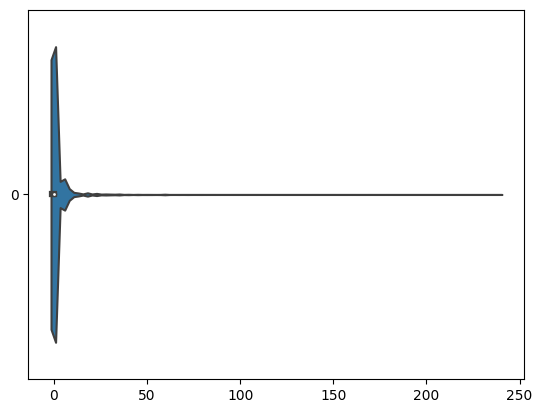

In [10]:
sns.violinplot(dfhc[a], orient='h')

In [11]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
OverduePaymentsNumber       int64
dtype: object

In [ ]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [12]:
dfhc[a].unique()

array([ 23,  14,   9,  18,  10,  15,  26,   8,  20,  11,  12,  27,  34,
        19,  13,  31,  28,  17,  22,  35,  33,  32,  24,  21,  81,  60,
        46,  85,  25,  30,  47,  16,  57,  96,  36,  41, 240,  37,  39,
        53,  86,  59,  80,  29,  38,  68,  49,  44,  52,  83,  45,  79,
       175, 114,  71,  43,  42,  50,  56,  48,  63,  55, 180,  66, 168,
        58,  73,  64, 113, 135,  40, 102,  61, 132, 120,  76,  65,  51,
       151,  62,  54,  94, 179, 156, 122,  72,  95,  67,  90, 110, 173,
        75,  78, 100,  82, 115, 117,  69,  77,  92,  97, 174,  70,  88,
       170,  98,  87, 108,  74, 158, 118, 103, 106,  93, 116, 105, 137,
        91, 140, 150, 109, 121, 124, 131,  89, 127, 154, 112,  84, 101,
       104, 134,  99, 160, 107,   0,   1,   2,   3,   4,   5,   6,   7,
        -1], dtype=int64)

In [13]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [14]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OverduePaymentsNumber,OverduePaymentsNumber_bin
495540,2104178,8367c332-375b-43fa-935f-2a207e37f7ab,T02981536,2024-01-18,Granted,-1,Very Low
220593,2009920,2e175c66-b449-474d-b6ff-87854df93724,R03082295,2023-08-21,Granted,0,Very Low
137004,2271703,28ebd1ca-79a8-4cb4-9d5b-db393a5bc5e6,N04551674,2023-10-14,Granted,0,Very Low
353656,2109622,0596d60b-1fb8-4636-b89d-6ba8df872631,602531950,2023-06-27,Granted,0,Very Low
208939,2336718,5910f140-4b3f-452d-9f63-a4779b0cd78b,M00992424,2023-12-17,Granted,0,Very Low
164174,2208611,9880eeb3-55df-4677-b473-6c6001d4542c,704071163,2023-08-26,Granted,0,Very Low
440402,1989981,f67c6ccc-c0c4-4f60-92e5-b3dae7dbdc4c,B04350724,2023-04-11,Granted,1,Very Low
57480,1631730,a0cf8d6e-653a-41d9-9715-46baae2fde93,604132403,2023-08-25,Granted,0,Very Low
295120,1641804,5a1f7998-4788-4c16-9d3f-21a5131cb3b4,404733533,2023-10-24,Granted,0,Very Low
86387,2112766,a7b58633-40fa-43e6-b45d-6839f9c75c54,Q03153294,2023-06-30,Granted,0,Very Low


In [15]:
dfhc[b].value_counts()

Very Low     678799
Low             602
Medium           70
High             47
Very High         7
Name: OverduePaymentsNumber_bin, dtype: int64

In [16]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max47       678799
Low_Min48_Max95               602
Medium_Min96_Max140            70
High_Min150_Max180             47
Very High_Min240_Max240         7
Name: OverduePaymentsNumber_bin, dtype: int64

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_quantiles = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


-1.00-0.00     406017
nan            199636
1.00-240.00     43855
0.00-1.00       30017
Name: OverduePaymentsNumber_bin_labels, dtype: int64


<AxesSubplot: xlabel='OverduePaymentsNumber_bin_labels', ylabel='Count'>

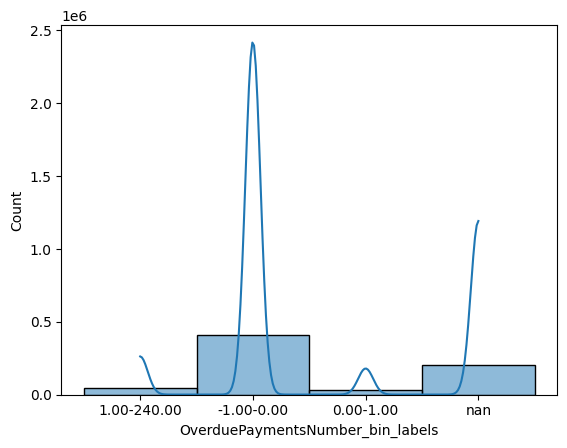

In [18]:
sns.histplot(dfhc[c], kde = True)

In [19]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   customerId                        679525 non-null  object
 1   Tonikloanid                       679525 non-null  object
 2   CBContract                        679525 non-null  object
 3   run_date                          679525 non-null  dbdate
 4   ContractInstallmentType           679525 non-null  object
 5   OverduePaymentsNumber             679525 non-null  int64 
 6   OverduePaymentsNumber_bin         679525 non-null  int64 
 7   OverduePaymentsNumber_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [20]:
dfhc[c] = dfhc[c].astype(str)

In [21]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,OverduePaymentsNumber,OverduePaymentsNumber_bin,OverduePaymentsNumber_bin_labels,joint
559476,1631464,95ac6b92-240d-48d4-ac53-d6febdf54691,R05235048,2023-10-02,NotGranted,-1,0,nan,NotGranted_nan
4561,2411448,e312f5f1-cb32-42b2-a9e0-ec3687bece6c,D00150029,2024-02-25,Granted,15,2,1.00-240.00,Granted_1.00-240.00
620594,2216610,bd9c545c-248f-4958-a65f-788d09b1b947,O04800454,2023-09-01,NotGranted,-1,0,nan,NotGranted_nan
556395,2248759,d30e7c63-72c6-492f-9d98-af9e2597fa52,004733341,2023-09-26,NotGranted,-1,0,nan,NotGranted_nan
543589,2102982,881759f1-deb5-4799-9edc-bd641a6fa837,601744428,2023-08-06,Granted,-1,0,nan,Granted_nan
63283,1954684,bb5db8d7-291a-44a0-bd65-62a044379da2,401204957,2023-03-22,Granted,0,0,-1.00-0.00,Granted_-1.00-0.00


In [22]:
dfhc.joint.value_counts()

Granted_-1.00-0.00     406017
Granted_nan            111750
NotGranted_nan          87886
Granted_1.00-240.00     43855
Granted_0.00-1.00       30017
Name: joint, dtype: int64

In [23]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                        \
joint      Granted_-1.00-0.00 Granted_0.00-1.00 Granted_1.00-240.00   
customerId                                                            
2174944                   NaN               NaN                 NaN   
2282339                   4.0               NaN                 NaN   
1643611                   1.0               NaN                 NaN   
1968403                   NaN               NaN                 NaN   
2146230                   NaN               NaN                 NaN   

                                             Tonikloanid                    \
joint      Granted_nan NotGranted_nan Granted_-1.00-0.00 Granted_0.00-1.00   
customerId                                                                   
2174944            3.0            NaN                NaN               NaN   
2282339            NaN            NaN                1.0               NaN   
1643611            1.0            2.0                1.0               NaN   
1968403            NaN            1.0                NaN               NaN   
2146230            NaN            1.0                NaN               NaN   

                                                           
joint      Granted_1.00-240.00 Granted_nan NotGranted_nan  
customerId                                                 
2174944                    NaN         1.0            NaN  
2282339                    NaN         NaN            NaN  
1643611                    NaN         2.0            2.0  
1968403                    NaN         NaN            1.0  
2146230                    NaN         NaN            1.0

In [24]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1.00-0.00)      1
(CBContract, Granted_0.00-1.00)       1
(CBContract, Granted_1.00-240.00)     1
(CBContract, Granted_nan)             1
(CBContract, NotGranted_nan)          1
(Tonikloanid, Granted_-1.00-0.00)     1
(Tonikloanid, Granted_0.00-1.00)      1
(Tonikloanid, Granted_1.00-240.00)    1
(Tonikloanid, Granted_nan)            1
(Tonikloanid, NotGranted_nan)         1
dtype: int64

In [25]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',  'Granted_-1.00-0.00'),
            ( 'CBContract',   'Granted_0.00-1.00'),
            ( 'CBContract', 'Granted_1.00-240.00'),
            ( 'CBContract',         'Granted_nan'),
            ( 'CBContract',      'NotGranted_nan'),
            ('Tonikloanid',  'Granted_-1.00-0.00'),
            ('Tonikloanid',   'Granted_0.00-1.00'),
            ('Tonikloanid', 'Granted_1.00-240.00'),
            ('Tonikloanid',         'Granted_nan'),
            ('Tonikloanid',      'NotGranted_nan')],
           names=[None, 'joint'])

In [26]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,OverduePaymentsNumber_CBContract_Granted_-1.00-0.00,OverduePaymentsNumber_CBContract_Granted_0.00-1.00,OverduePaymentsNumber_CBContract_Granted_1.00-240.00,OverduePaymentsNumber_CBContract_Granted_nan,OverduePaymentsNumber_CBContract_NotGranted_nan,OverduePaymentsNumber_Tonikloanid_Granted_-1.00-0.00,OverduePaymentsNumber_Tonikloanid_Granted_0.00-1.00,OverduePaymentsNumber_Tonikloanid_Granted_1.00-240.00,OverduePaymentsNumber_Tonikloanid_Granted_nan,OverduePaymentsNumber_Tonikloanid_NotGranted_nan
0,1000001,7.0,NaN,1.0,NaN,2.0,3.0,NaN,3.0,NaN,2.0
1,1000085,12.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0
2,1000192,8.0,NaN,1.0,3.0,3.0,2.0,NaN,2.0,2.0,2.0
3,1000243,25.0,NaN,NaN,4.0,1.0,1.0,NaN,NaN,1.0,1.0
4,1000278,17.0,3.0,4.0,15.0,10.0,3.0,3.0,3.0,3.0,3.0


In [34]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [35]:
df_result.dtypes

customerId                                                 int64
OverduePaymentsNumber_CBContract_Granted_-1.00-0.00      float64
OverduePaymentsNumber_CBContract_Granted_0.00-1.00       float64
OverduePaymentsNumber_CBContract_Granted_1.00-240.00     float64
OverduePaymentsNumber_CBContract_Granted_nan             float64
OverduePaymentsNumber_CBContract_NotGranted_nan          float64
OverduePaymentsNumber_Tonikloanid_Granted_-1.00-0.00     float64
OverduePaymentsNumber_Tonikloanid_Granted_0.00-1.00      float64
OverduePaymentsNumber_Tonikloanid_Granted_1.00-240.00    float64
OverduePaymentsNumber_Tonikloanid_Granted_nan            float64
OverduePaymentsNumber_Tonikloanid_NotGranted_nan         float64
dtype: object

In [36]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [37]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [38]:
df.to_csv("cicdata_20240226.csv", index = False)

In [39]:
df_result.to_csv(f"{a}.csv")

In [40]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 505)
The size of df is:	49538985
the number of dimensions of df is:	2


# FinancedAmount

In [41]:
a = 'FinancedAmount'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a}
-- date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 9682b31a-c2a4-4579-9c7e-e10f7bde20d1 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [42]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,FinancedAmount
379438,2398214,aadbf27b-94d0-4698-b058-b894ebe5fd83,B03199466,2024-02-12,Granted,2500
233921,2341296,61a4ecf4-0b77-49af-8bef-937e686dc43f,M03811361,2023-12-28,Granted,13233
353453,1087992,783ed755-ffa5-4dfb-90f4-f79c9052e6de,B01165395,2023-05-11,Granted,8238
314105,2227837,2d425ab9-4837-4054-80fb-4d1c819a4d53,504740208,2024-01-16,Granted,2000
625099,2267351,0c319111-20be-402c-8478-4183bb61760a,D01953201,2023-10-10,Granted,-1
470216,1997798,b35a4d5d-2832-461b-9a97-becc9c4afec5,O04243781,2023-09-09,Granted,100


In [43]:
dfhc[a] = dfhc[a].fillna(-1)

In [44]:
# dfhc.rename(columns = {a:'Nextpaymentmonthtorundate'}, inplace = True)

In [45]:
# a = 'Nextpaymentmonthtorundate'

In [46]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
FinancedAmount             object
dtype: object

In [47]:
dfhc[a].describe()

count     679525
unique     32046
top           -1
freq      181120
Name: FinancedAmount, dtype: object

In [48]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

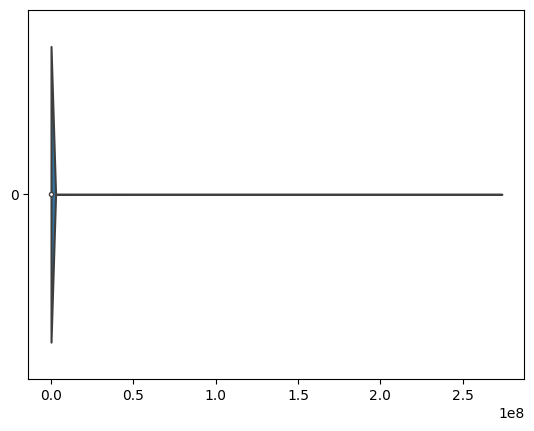

In [49]:
sns.violinplot(dfhc[a], orient='h')

In [50]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
FinancedAmount              int64
dtype: object

In [51]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [52]:
dfhc[a].unique()

array([  9845,     -1,   3000, ..., 168200, 234700,  54099], dtype=int64)

In [53]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [54]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,FinancedAmount,FinancedAmount_bin
275715,1598009,b6dd9d67-d5df-4842-89b7-e65db1e548be,H03699037,2023-02-05,Granted,4000,Very Low
94057,1077622,67127a2f-5c19-4451-8287-a69a78c22bbd,J03701641,2023-06-10,Granted,10010,Very Low
180483,2242004,84c75f9c-442e-496b-bbf8-cde51df3d69f,H02753292,2023-10-27,Granted,5605,Very Low
253721,2242687,857bbf0b-1756-4751-8c86-402e40f47ef8,003388964,2023-09-21,Granted,1000,Very Low
475488,2253179,32107016-17c9-404b-b21a-249d415da5b1,600413674,2023-09-30,Granted,-1,Very Low
465736,1865139,3f4a9f79-5d8f-4110-b975-d8f69ec1cc22,O04137191,2023-01-17,Granted,2000,Very Low
253594,2213658,95bb05a8-7772-462d-b584-7ef1e7b1471e,703170451,2023-10-26,Granted,2300,Very Low
465640,2252346,c258580a-1dd1-45d0-b8c1-ca53e51306e6,P04204383,2023-09-29,Granted,3500,Very Low
631028,2407431,4ef87e5a-7afa-423f-ac26-4dcb9a29ea17,903917673,2024-02-21,Granted,-1,Very Low
20538,1345420,1bbc4b78-6962-4bb8-b156-f75c3b250b2b,S06858879,2024-02-13,Granted,1110,Very Low


In [55]:
dfhc[b].value_counts()

Very Low     679504
Low              18
Medium            1
High              1
Very High         1
Name: FinancedAmount_bin, dtype: int64

In [56]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max54040000             679504
Low_Min57511040_Max95511040                18
Medium_Min113920000_Max113920000            1
High_Min179172424_Max179172424              1
Very High_Min273713715_Max273713715         1
Name: FinancedAmount_bin, dtype: int64

In [57]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_quantiles = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


nan                      181120
183.00-1000.00            76837
16577.20-50000.00         75972
9227.00-16577.20          67950
1000.00-3000.00           65800
5000.00-9227.00           65287
3000.00-5000.00           63851
50000.00-273713715.00     59933
-1.00-183.00              22775
Name: FinancedAmount_bin_labels, dtype: int64


<AxesSubplot: xlabel='FinancedAmount_bin_labels', ylabel='Count'>

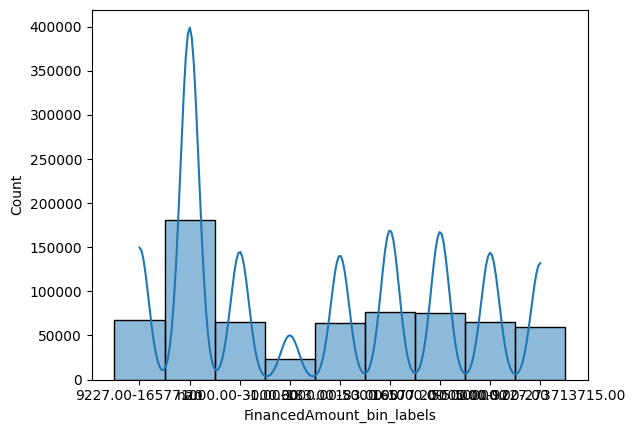

In [58]:
sns.histplot(dfhc[c], kde = True)

In [59]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   customerId                 679525 non-null  object
 1   Tonikloanid                679525 non-null  object
 2   CBContract                 679525 non-null  object
 3   run_date                   679525 non-null  dbdate
 4   ContractInstallmentType    679525 non-null  object
 5   FinancedAmount             679525 non-null  int64 
 6   FinancedAmount_bin         679525 non-null  int64 
 7   FinancedAmount_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(2), object(5)
memory usage: 41.5+ MB


In [60]:
dfhc[c] = dfhc[c].astype(str)

In [61]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[c]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,FinancedAmount,FinancedAmount_bin,FinancedAmount_bin_labels,joint
472447,1294469,31494a87-4fd0-44f5-8593-3f12d874f019,E04651469,2023-12-08,NotGranted,50000,6,16577.20-50000.00,NotGranted_16577.20-50000.00
29931,2175001,2bd74b1b-9425-403e-b356-0700180c582c,B04501706,2024-01-22,Granted,15365,5,9227.00-16577.20,Granted_9227.00-16577.20
275068,2123622,a53d4b95-c115-4663-8d54-cb83c2a72391,H00300526,2023-07-07,Granted,-1,0,nan,Granted_nan
672013,2010291,7d83e453-f763-4cc9-803f-b126335c1d0f,G01619860,2023-04-23,Granted,2000,2,1000.00-3000.00,Granted_1000.00-3000.00
246079,1590927,4f966882-efff-443e-8ffb-452dec628a40,R01258965,2023-11-02,Granted,1500,2,1000.00-3000.00,Granted_1000.00-3000.00
212551,1985677,1c5d6c38-ed81-431c-8f59-d94ef9284346,T04348487,2023-04-09,Granted,30000,6,16577.20-50000.00,Granted_16577.20-50000.00


In [62]:
dfhc.joint.value_counts()

Granted_nan                         133469
Granted_183.00-1000.00               72599
Granted_16577.20-50000.00            65573
Granted_1000.00-3000.00              64984
Granted_5000.00-9227.00              62812
Granted_3000.00-5000.00              59603
Granted_9227.00-16577.20             59079
Granted_50000.00-273713715.00        54061
NotGranted_nan                       47651
Granted_-1.00-183.00                 19459
NotGranted_16577.20-50000.00         10399
NotGranted_9227.00-16577.20           8871
NotGranted_50000.00-273713715.00      5872
NotGranted_3000.00-5000.00            4248
NotGranted_183.00-1000.00             4238
NotGranted_-1.00-183.00               3316
NotGranted_5000.00-9227.00            2475
NotGranted_1000.00-3000.00             816
Name: joint, dtype: int64

In [63]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                          \
joint      Granted_-1.00-183.00 Granted_1000.00-3000.00   
customerId                                                
2112121                     NaN                     NaN   
2224545                     NaN                     NaN   
1869166                     NaN                     NaN   
1879496                     NaN                     1.0   
1960867                     NaN                     NaN   

                                                             \
joint      Granted_16577.20-50000.00 Granted_183.00-1000.00   
customerId                                                    
2112121                          NaN                    NaN   
2224545                          NaN                    NaN   
1869166                          NaN                    NaN   
1879496                          NaN                    NaN   
1960867                          NaN                    NaN   

                                                            \
joint      Granted_3000.00-5000.00 Granted_5000.00-9227.00   
customerId                                                   
2112121                        NaN                     NaN   
2224545                        NaN                     NaN   
1869166                        NaN                     NaN   
1879496                        NaN                     NaN   
1960867                        NaN                     NaN   

                                                                               \
joint      Granted_50000.00-273713715.00 Granted_9227.00-16577.20 Granted_nan   
customerId                                                                      
2112121                              2.0                      NaN         3.0   
2224545                              NaN                      NaN         NaN   
1869166                              NaN                      1.0         NaN   
1879496                              NaN                      NaN         NaN   
1960867                              NaN                      NaN         NaN   

                                                               \
joint      NotGranted_-1.00-183.00 NotGranted_1000.00-3000.00   
customerId                                                      
2112121                        NaN                        NaN   
2224545                        NaN                        NaN   
1869166                        NaN                        NaN   
1879496                        NaN                        NaN   
1960867                        NaN                        NaN   

                                                                   \
joint      NotGranted_16577.20-50000.00 NotGranted_183.00-1000.00   
customerId                                                          
2112121                             NaN                       NaN   
2224545                             NaN                       NaN   
1869166                             NaN                       NaN   
1879496                             NaN                       NaN   
1960867                             NaN                       1.0   

                                                                  \
joint      NotGranted_3000.00-5000.00 NotGranted_5000.00-9227.00   
customerId                                                         
2112121                           NaN                        NaN   
2224545                           NaN                        NaN   
1869166                           NaN                        NaN   
1879496                           NaN                        NaN   
1960867                           NaN                        NaN   

                                                                         \
joint      NotGranted_50000.00-273713715.00 NotGranted_9227.00-16577.20   
customerId                                                                
2112121                                 NaN          

In [64]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1.00-183.00)                 1
(CBContract, Granted_1000.00-3000.00)              1
(Tonikloanid, Granted_16577.20-50000.00)           1
(Tonikloanid, Granted_183.00-1000.00)              1
(Tonikloanid, Granted_3000.00-5000.00)             1
(Tonikloanid, Granted_5000.00-9227.00)             1
(Tonikloanid, Granted_50000.00-273713715.00)       1
(Tonikloanid, Granted_9227.00-16577.20)            1
(Tonikloanid, Granted_nan)                         1
(Tonikloanid, NotGranted_-1.00-183.00)             1
(Tonikloanid, NotGranted_1000.00-3000.00)          1
(Tonikloanid, NotGranted_16577.20-50000.00)        1
(Tonikloanid, NotGranted_183.00-1000.00)           1
(Tonikloanid, NotGranted_3000.00-5000.00)          1
(Tonikloanid, NotGranted_5000.00-9227.00)          1
(Tonikloanid, NotGranted_50000.00-273713715.00)    1
(Tonikloanid, NotGranted_9227.00-16577.20)         1
(Tonikloanid, Granted_1000.00-3000.00)             1
(Tonikloanid, Granted_-1.00-183.00)           

In [65]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',             'Granted_-1.00-183.00'),
            ( 'CBContract',          'Granted_1000.00-3000.00'),
            ( 'CBContract',        'Granted_16577.20-50000.00'),
            ( 'CBContract',           'Granted_183.00-1000.00'),
            ( 'CBContract',          'Granted_3000.00-5000.00'),
            ( 'CBContract',          'Granted_5000.00-9227.00'),
            ( 'CBContract',    'Granted_50000.00-273713715.00'),
            ( 'CBContract',         'Granted_9227.00-16577.20'),
            ( 'CBContract',                      'Granted_nan'),
            ( 'CBContract',          'NotGranted_-1.00-183.00'),
            ( 'CBContract',       'NotGranted_1000.00-3000.00'),
            ( 'CBContract',     'NotGranted_16577.20-50000.00'),
            ( 'CBContract',        'NotGranted_183.00-1000.00'),
            ( 'CBContract',       'NotGranted_3000.00-5000.00'),
            ( 'CBContract',       'NotGranted_5000.00-9227.00'),
            ( 'CBContract

In [66]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,FinancedAmount_CBContract_Granted_-1.00-183.00,FinancedAmount_CBContract_Granted_1000.00-3000.00,FinancedAmount_CBContract_Granted_16577.20-50000.00,FinancedAmount_CBContract_Granted_183.00-1000.00,FinancedAmount_CBContract_Granted_3000.00-5000.00,FinancedAmount_CBContract_Granted_5000.00-9227.00,FinancedAmount_CBContract_Granted_50000.00-273713715.00,FinancedAmount_CBContract_Granted_9227.00-16577.20,FinancedAmount_CBContract_Granted_nan,FinancedAmount_CBContract_NotGranted_-1.00-183.00,FinancedAmount_CBContract_NotGranted_1000.00-3000.00,FinancedAmount_CBContract_NotGranted_16577.20-50000.00,FinancedAmount_CBContract_NotGranted_183.00-1000.00,FinancedAmount_CBContract_NotGranted_3000.00-5000.00,FinancedAmount_CBContract_NotGranted_5000.00-9227.00,FinancedAmount_CBContract_NotGranted_50000.00-273713715.00,FinancedAmount_CBContract_NotGranted_9227.00-16577.20,FinancedAmount_CBContract_NotGranted_nan,FinancedAmount_Tonikloanid_Granted_-1.00-183.00,FinancedAmount_Tonikloanid_Granted_1000.00-3000.00,FinancedAmount_Tonikloanid_Granted_16577.20-50000.00,FinancedAmount_Tonikloanid_Granted_183.00-1000.00,FinancedAmount_Tonikloanid_Granted_3000.00-5000.00,FinancedAmount_Tonikloanid_Granted_5000.00-9227.00,FinancedAmount_Tonikloanid_Granted_50000.00-273713715.00,FinancedAmount_Tonikloanid_Granted_9227.00-16577.20,FinancedAmount_Tonikloanid_Granted_nan,FinancedAmount_Tonikloanid_NotGranted_-1.00-183.00,FinancedAmount_Tonikloanid_NotGranted_1000.00-3000.00,FinancedAmount_Tonikloanid_NotGranted_16577.20-50000.00,FinancedAmount_Tonikloanid_NotGranted_183.00-1000.00,FinancedAmount_Tonikloanid_NotGranted_3000.00-5000.00,FinancedAmount_Tonikloanid_NotGranted_5000.00-9227.00,FinancedAmount_Tonikloanid_NotGranted_50000.00-273713715.00,FinancedAmount_Tonikloanid_NotGranted_9227.00-16577.20,FinancedAmount_Tonikloanid_NotGranted_nan
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1,1000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
2,1000192,NaN,2.0,2.0,NaN,NaN,1.0,NaN,1.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,1000243,NaN,NaN,4.0,NaN,2.0,2.0,NaN,3.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,1000278,NaN,4.0,1.0,NaN,5.0,10.0,7.0,5.0,6.0,NaN,NaN,2.0,1.0,NaN,NaN,2.0,1.0,4.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,NaN,NaN,2.0,3.0,NaN,NaN,3.0,3.0,3.0


In [67]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [68]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [69]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [70]:
df.to_csv("cicdata_20240226.csv", index = False)

In [71]:
df_result.to_csv(f"{a}.csv")

In [72]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 541)
The size of df is:	53070477
the number of dimensions of df is:	2


# FlagCardUsed

In [73]:
a = 'FlagCardUsed'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a}
-- date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 582fbbe0-fa71-4554-96a7-5e7d1f34807a successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [74]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,FlagCardUsed
308566,1917767,9e3c49b5-3209-48c0-a2ca-fed40b0d1328,O00631784,2023-02-27,Granted,-1
20603,2181267,546862f6-0068-4c51-baf0-25de6d0bac68,J03513194,2024-01-02,Granted,-1
66685,2341375,bf0efce6-3edc-4613-813f-97a6cef8edad,900684930,2024-01-05,Granted,0
608344,2317886,1ed4d5eb-ebe3-4ba3-acbe-ad08148d02e3,605325951,2024-01-18,NotGranted,-1
99945,2084647,632cf6bc-e563-4a85-8a88-9581f8bcb1bb,402241754,2024-01-10,Granted,-1
87925,1517974,6dba2e6a-715e-4802-a073-27ee63adba27,H00670967,2024-02-22,Granted,-1


In [75]:
dfhc[a] = dfhc[a].fillna(-1)

In [76]:
# dfhc.rename(columns = {a:'Nextpaymentmonthtorundate'}, inplace = True)

In [77]:
# a = 'Nextpaymentmonthtorundate'

In [78]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
FlagCardUsed               object
dtype: object

In [79]:
dfhc[a].describe()

count     679525
unique         3
top           -1
freq      654757
Name: FlagCardUsed, dtype: object

In [80]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

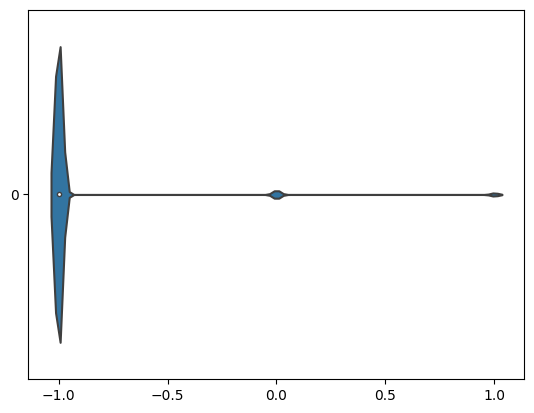

In [81]:
sns.violinplot(dfhc[a], orient='h')

In [82]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
FlagCardUsed                int64
dtype: object

In [83]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [84]:
dfhc[a].unique()

array([-1,  0,  1], dtype=int64)

In [85]:
# import pandas as pd

# # Create 5 bins with labels
# num_bins = 5
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# # Perform binning using pandas cut
# dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [86]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,FlagCardUsed
650533,2100375,6808b0a2-de21-43b5-b21a-93df1a6db2fe,H03034326,2023-06-20,Granted,-1
25194,1431147,06140055-93ad-42eb-99bb-d04dbd9af444,T00156723,2023-11-09,Granted,0
276523,1959592,41728b1c-db1c-47f1-8f25-fb9b899dcf23,301331687,2023-03-25,Granted,-1
238178,2394880,403d5f15-8300-47bd-9d6e-81bc32fb4433,903156553,2024-02-09,Granted,-1
648710,2236996,c87d9d00-c735-40f8-9356-ff9469ce4c43,902231119,2023-09-17,Granted,-1
359949,1861249,431640a6-6d12-468e-ae7e-c0cfd9a8e531,O04766052,2023-11-07,Granted,-1
242146,1258300,5440f81f-8f9e-465d-837e-336e5c177b43,904430839,2023-01-13,Granted,-1
92268,1829736,bca7f662-516b-408b-9e41-4943792c93ba,I04306227,2023-10-28,Granted,-1
263786,1349533,d33e13af-9bd9-4308-ad27-4fc8959f0a11,403814503,2023-11-15,Granted,-1
165103,2127579,5831cda2-b438-47c2-a03d-bd08d9d9fc65,902237059,2023-07-09,Granted,-1


In [88]:
dfhc[a].value_counts()

-1    654757
 0     18008
 1      6760
Name: FlagCardUsed, dtype: int64

In [89]:
# min_scores = dfhc.groupby(b)[a].transform('min')
# max_scores = dfhc.groupby(b)[a].transform('max')
# # Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
# dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
# dfhc[b].value_counts()

In [90]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='FlagCardUsed', ylabel='Count'>

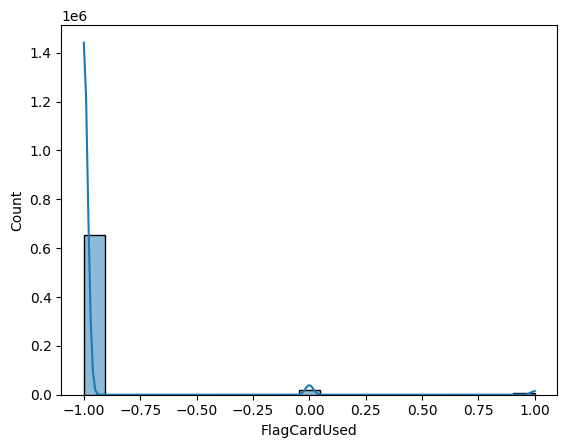

In [92]:
sns.histplot(dfhc[a], kde = True)

In [93]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   FlagCardUsed             679525 non-null  int64 
dtypes: dbdate(1), int64(1), object(4)
memory usage: 31.1+ MB


In [94]:
dfhc[a] = dfhc[a].astype(str)

In [95]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[a]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,FlagCardUsed,joint
609186,1858744,7bee5fba-e875-4c13-9ae0-a92f681a9c24,M04531452,2023-08-05,NotGranted,-1,NotGranted_-1
476090,2386299,48aea1b5-f262-48d4-bf53-427529a596c6,I02977110,2024-02-01,Granted,-1,Granted_-1
449011,2222157,32c972a8-a3a2-4446-a7ff-10abd874aa22,P04237518,2023-09-05,Granted,-1,Granted_-1
194373,1846216,5bfa2288-25ef-4e0e-8191-69afc6148c14,904593452,2023-10-31,NotGranted,-1,NotGranted_-1
502512,2262514,036af527-191f-4ca4-91ad-bc8bb6e388cd,A02139018,2023-10-06,Granted,-1,Granted_-1
537040,1914349,2549e389-4e2a-416a-a1aa-05ab0da3f130,Q03599502,2023-02-23,Granted,-1,Granted_-1


In [96]:
dfhc.joint.value_counts()

Granted_-1       566871
NotGranted_-1     87886
Granted_0         18008
Granted_1          6760
Name: joint, dtype: int64

In [97]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                                   Tonikloanid            \
joint      Granted_-1 Granted_0 Granted_1 NotGranted_-1  Granted_-1 Granted_0   
customerId                                                                      
2362407          17.0       NaN       NaN           NaN         1.0       NaN   
2309969          22.0       3.0       1.0           1.0         1.0       1.0   
1615953           2.0       NaN       NaN           1.0         2.0       NaN   
2362030           2.0       NaN       NaN           2.0         1.0       NaN   
2223662           2.0       NaN       NaN           1.0         1.0       NaN   

                                    
joint      Granted_1 NotGranted_-1  
customerId                          
2362407          NaN           NaN  
2309969          1.0           1.0  
1615953          NaN           1.0  
2362030          NaN           1.0  
2223662          NaN           1.0

In [98]:
result_pivot.columns.value_counts()

(CBContract, Granted_-1)        1
(CBContract, Granted_0)         1
(CBContract, Granted_1)         1
(CBContract, NotGranted_-1)     1
(Tonikloanid, Granted_-1)       1
(Tonikloanid, Granted_0)        1
(Tonikloanid, Granted_1)        1
(Tonikloanid, NotGranted_-1)    1
dtype: int64

In [99]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',    'Granted_-1'),
            ( 'CBContract',     'Granted_0'),
            ( 'CBContract',     'Granted_1'),
            ( 'CBContract', 'NotGranted_-1'),
            ('Tonikloanid',    'Granted_-1'),
            ('Tonikloanid',     'Granted_0'),
            ('Tonikloanid',     'Granted_1'),
            ('Tonikloanid', 'NotGranted_-1')],
           names=[None, 'joint'])

In [100]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,FlagCardUsed_CBContract_Granted_-1,FlagCardUsed_CBContract_Granted_0,FlagCardUsed_CBContract_Granted_1,FlagCardUsed_CBContract_NotGranted_-1,FlagCardUsed_Tonikloanid_Granted_-1,FlagCardUsed_Tonikloanid_Granted_0,FlagCardUsed_Tonikloanid_Granted_1,FlagCardUsed_Tonikloanid_NotGranted_-1
0,1000001,5.0,3.0,NaN,2.0,3.0,3.0,NaN,2.0
1,1000085,10.0,3.0,NaN,2.0,2.0,2.0,NaN,2.0
2,1000192,10.0,2.0,NaN,3.0,2.0,2.0,NaN,2.0
3,1000243,26.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,1000278,38.0,NaN,NaN,10.0,3.0,NaN,NaN,3.0


In [101]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [102]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [103]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [104]:
df.to_csv("cicdata_20240226.csv", index = False)

In [105]:
df_result.to_csv(f"{a}.csv")

In [106]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 549)
The size of df is:	53855253
the number of dimensions of df is:	2


# MinPaymentPercentage


In [107]:
a = 'MinPaymentPercentage'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a}
-- date_diff(date(run_date), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID d1727185-9e69-4353-ab42-b3ce7ced131d successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [108]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MinPaymentPercentage
27091,1936694,b0349107-ee43-4b37-99f1-f67c944f7631,D04455965,2023-07-06,NotGranted,-1
48565,2233061,77df9dc5-8457-4fa0-ab5b-4d1ae56e4ee6,405302108,2023-09-14,NotGranted,-1
117035,2300387,ea3330b2-914b-4a93-ae9f-3364aa2012c2,D05359569,2024-02-11,NotGranted,-1
345311,1634554,a00cc956-804f-46e2-b087-eddf998f0de5,304659796,2023-06-25,NotGranted,-1
459602,2126534,5d7c0004-aa12-4862-b8b4-57725c24c48a,F04771987,2023-07-09,Granted,-1
390374,1428370,8b249a5e-da2b-482e-884f-dee905ae9528,F04464196,2023-04-28,Granted,-1


In [109]:
dfhc[a] = dfhc[a].fillna(-1)

In [110]:
# dfhc.rename(columns = {a:'Nextpaymentmonthtorundate'}, inplace = True)

In [111]:
# a = 'Nextpaymentmonthtorundate'

In [112]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
MinPaymentPercentage       object
dtype: object

In [113]:
dfhc[a].describe()

count     679525
unique       101
top           -1
freq      654901
Name: MinPaymentPercentage, dtype: object

In [114]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

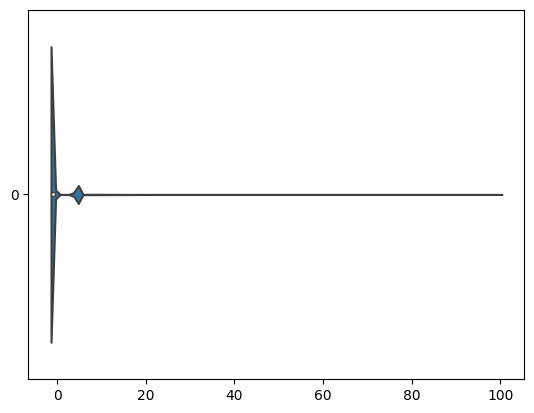

In [115]:
sns.violinplot(dfhc[a], orient='h')

In [116]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
MinPaymentPercentage        int64
dtype: object

In [117]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [118]:
dfhc[a].unique()

array([ -1,   5,  34,   0,   4,   6, 100,   8,  59,  11,  27,  44,  12,
        17,   3,  33,  29,  94,  25,  16,  52,  10,  75,  14,  46,  31,
        65,   9,  15,  30,  19,  71,   7,  42,  28,  92,  58,  80,  90,
        37,  20,  32,  21,  22,  96,  13,  26,  43,  36,  78,  54,  18,
        35,  48,  73,  23,  56,  64,  45,  38,  88,  77,  87,  51,  57,
        81,  99,  89,  84,  55,  24,  40,  41,  67,  86,  49,  62,  68,
        79,  63,  47,  97,  93,  39,  95,  74,  50,  76,  98,  66,  69,
        61,  60,  70,  91,   2,  72,  85,  53,  82,  83], dtype=int64)

In [124]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [125]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MinPaymentPercentage,MinPaymentPercentage_bin,MinPaymentPercentage_bin_labels
376325,2097248,df666652-d71c-4cce-887e-ba1b8d4641aa,104008036,2023-06-17,Granted,-1,Very Low,nan
554096,1454225,b2b45645-c52a-4db5-9411-bbd1a7f59fcf,M00412969,2023-05-11,Granted,-1,Very Low,nan
202400,1518731,07871cb7-7387-41c1-8769-5f541a82021e,102514809,2023-08-16,Granted,-1,Very Low,nan
148249,2411259,6d40afaa-b998-43b3-b762-9db2f4bc6d9b,504771866,2024-02-25,Granted,-1,Very Low,nan
427170,1243282,7c066b36-69c7-465c-9028-3b29929f55f5,204207804,2023-08-26,Granted,-1,Very Low,nan
534705,1894435,1eeac305-9a5e-4b9f-b8f2-6f327fdb853c,K03437052,2023-02-11,Granted,-1,Very Low,nan
411639,1731039,46ae64cf-26dd-4e1f-a139-2b1050e29e77,504224336,2023-03-16,Granted,-1,Very Low,nan
327625,2364136,ff6ab9d4-4515-4b56-8e11-08270a90b196,G05017702,2024-01-10,Granted,-1,Very Low,nan
346409,2369654,fa0be233-b536-403b-8945-36ced71fbc27,K05318836,2024-01-15,Granted,-1,Very Low,nan
597155,2352130,a3609d0c-04a9-4c44-bd7c-2f64c341c18c,O05161158,2023-12-29,NotGranted,-1,Very Low,nan


In [126]:
dfhc[a].value_counts()

-1      654901
 5        9833
 0        9583
 4        2516
 3         367
 6         151
 7         140
 100       129
 9         121
 10        117
 8         113
 12         91
 11         81
 13         75
 14         59
 15         51
 18         51
 17         50
 19         46
 16         41
 22         34
 21         33
 20         33
 23         32
 26         30
 29         30
 35         28
 24         28
 28         25
 25         23
 33         23
 34         22
 30         22
 32         21
 45         20
 36         19
 99         18
 31         18
 40         18
 46         16
 51         16
 44         15
 59         15
 52         15
 62         14
 37         14
 94         14
 38         13
 42         13
 49         12
 79         12
 27         12
 57         12
 39         11
 54         11
 73         11
 58         11
 41         10
 55         10
 50         10
 88         10
 69         10
 43         10
 90         10
 63         10
 75          9
 61       

In [127]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max19      678391
Low_Min20_Max39              471
Very High_Min80_Max100       277
Medium_Min40_Max59           244
High_Min60_Max79             142
Name: MinPaymentPercentage_bin, dtype: int64

In [123]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# Replace 'X' with the actual column name if it's different

# Create an imputer and fit_transform the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(dfhc[[a]])

# Convert the imputed values to a pandas Series
X_imputed_series = pd.Series(X_imputed.flatten())
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
c = f'{a}_{a1}_{a2}'
# Perform quantile binning using pandas qcut
num_quantiles = 10
dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# Assign bin edges as labels
label_edges = np.round(bin_edges, 2)
dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# Convert the Category datatype to string
dfhc[c] = dfhc[c].astype(str)

# Display the value counts of the new column
print(dfhc[c].value_counts())


nan             654901
-1.00-100.00     24624
Name: MinPaymentPercentage_bin_labels, dtype: int64


<AxesSubplot: xlabel='MinPaymentPercentage_bin', ylabel='Count'>

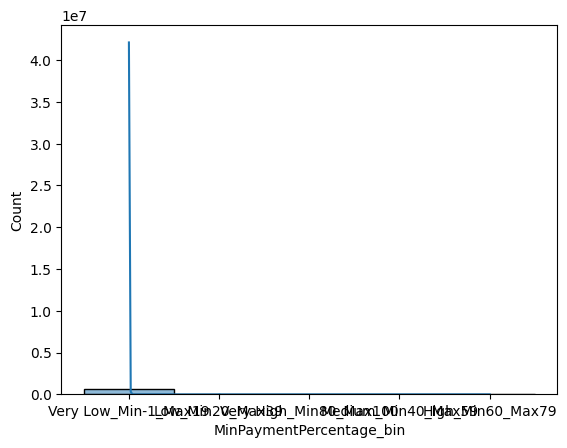

In [128]:
sns.histplot(dfhc[b], kde = True)

In [129]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   customerId                       679525 non-null  object
 1   Tonikloanid                      679525 non-null  object
 2   CBContract                       679525 non-null  object
 3   run_date                         679525 non-null  dbdate
 4   ContractInstallmentType          679525 non-null  object
 5   MinPaymentPercentage             679525 non-null  int64 
 6   MinPaymentPercentage_bin         679525 non-null  object
 7   MinPaymentPercentage_bin_labels  679525 non-null  object
dtypes: dbdate(1), int64(1), object(6)
memory usage: 41.5+ MB


In [130]:
dfhc[b] = dfhc[b].astype(str)

In [131]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,MinPaymentPercentage,MinPaymentPercentage_bin,MinPaymentPercentage_bin_labels,joint
310525,2044629,de998e26-b853-4cfb-8ef6-b3b9eb8701c5,E03813607,2023-05-15,Granted,-1,Very Low_Min-1_Max19,nan,Granted_Very Low_Min-1_Max19
216992,1934065,7bd6f4e8-7536-4664-bc03-62a58926cd04,502365013,2023-03-08,Granted,-1,Very Low_Min-1_Max19,nan,Granted_Very Low_Min-1_Max19
531136,1490016,97affd8e-f7aa-4591-92f2-6e7fda4fa199,T04207999,2023-03-18,Granted,-1,Very Low_Min-1_Max19,nan,Granted_Very Low_Min-1_Max19
563494,1145486,8bdb54c8-82e0-4096-8e87-1fdf49c4255a,J02304418,2023-06-29,Granted,-1,Very Low_Min-1_Max19,nan,Granted_Very Low_Min-1_Max19
371595,1646346,b6b57524-8e2f-433f-956a-ddb8e6361459,903697130,2024-01-21,Granted,-1,Very Low_Min-1_Max19,nan,Granted_Very Low_Min-1_Max19
55681,1977297,7f03d9f5-628e-49ae-9711-73078c24dfc1,T00620101,2023-10-22,Granted,-1,Very Low_Min-1_Max19,nan,Granted_Very Low_Min-1_Max19


In [132]:
dfhc.joint.value_counts()

Granted_Very Low_Min-1_Max19       590505
NotGranted_Very Low_Min-1_Max19     87886
Granted_Low_Min20_Max39               471
Granted_Very High_Min80_Max100        277
Granted_Medium_Min40_Max59            244
Granted_High_Min60_Max79              142
Name: joint, dtype: int64

In [133]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                          \
joint      Granted_High_Min60_Max79 Granted_Low_Min20_Max39   
customerId                                                    
2085378                         NaN                     NaN   
1973694                         NaN                     NaN   
2357049                         NaN                     NaN   
1223473                         NaN                     NaN   
2215490                         NaN                     NaN   

                                                                      \
joint      Granted_Medium_Min40_Max59 Granted_Very High_Min80_Max100   
customerId                                                             
2085378                           NaN                            NaN   
1973694                           NaN                            NaN   
2357049                           NaN                            NaN   
1223473                           NaN                            NaN   
2215490                           NaN                            NaN   

                                                                         \
joint      Granted_Very Low_Min-1_Max19 NotGranted_Very Low_Min-1_Max19   
customerId                                                                
2085378                             1.0                             NaN   
1973694                             NaN                             1.0   
2357049                             2.0                             NaN   
1223473                             4.0                             5.0   
2215490                             5.0                             NaN   

                        Tonikloanid                          \
joint      Granted_High_Min60_Max79 Granted_Low_Min20_Max39   
customerId                                                    
2085378                         NaN                     NaN   
1973694                         NaN                     NaN   
2357049                         NaN                     NaN   
1223473                         NaN                     NaN   
2215490                         NaN                     NaN   

                                                                      \
joint      Granted_Medium_Min40_Max59 Granted_Very High_Min80_Max100   
customerId                                                             
2085378                           NaN                            NaN   
1973694                           NaN                            NaN   
2357049                           NaN                            NaN   
1223473                           NaN                            NaN   
2215490                           NaN                            NaN   

                                                                         
joint      Granted_Very Low_Min-1_Max19 NotGranted_Very Low_Min-1_Max19  
customerId                                                               
2085378                             1.0                             NaN  
1973694                             NaN                             1.0  
2357049                             1.0                             NaN  
1223473                             1.0                             1.0  
2215490                             1.0                             NaN

In [134]:
result_pivot.columns.value_counts()

(CBContract, Granted_High_Min60_Max79)            1
(CBContract, Granted_Low_Min20_Max39)             1
(CBContract, Granted_Medium_Min40_Max59)          1
(CBContract, Granted_Very High_Min80_Max100)      1
(CBContract, Granted_Very Low_Min-1_Max19)        1
(CBContract, NotGranted_Very Low_Min-1_Max19)     1
(Tonikloanid, Granted_High_Min60_Max79)           1
(Tonikloanid, Granted_Low_Min20_Max39)            1
(Tonikloanid, Granted_Medium_Min40_Max59)         1
(Tonikloanid, Granted_Very High_Min80_Max100)     1
(Tonikloanid, Granted_Very Low_Min-1_Max19)       1
(Tonikloanid, NotGranted_Very Low_Min-1_Max19)    1
dtype: int64

In [135]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',        'Granted_High_Min60_Max79'),
            ( 'CBContract',         'Granted_Low_Min20_Max39'),
            ( 'CBContract',      'Granted_Medium_Min40_Max59'),
            ( 'CBContract',  'Granted_Very High_Min80_Max100'),
            ( 'CBContract',    'Granted_Very Low_Min-1_Max19'),
            ( 'CBContract', 'NotGranted_Very Low_Min-1_Max19'),
            ('Tonikloanid',        'Granted_High_Min60_Max79'),
            ('Tonikloanid',         'Granted_Low_Min20_Max39'),
            ('Tonikloanid',      'Granted_Medium_Min40_Max59'),
            ('Tonikloanid',  'Granted_Very High_Min80_Max100'),
            ('Tonikloanid',    'Granted_Very Low_Min-1_Max19'),
            ('Tonikloanid', 'NotGranted_Very Low_Min-1_Max19')],
           names=[None, 'joint'])

In [136]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,MinPaymentPercentage_CBContract_Granted_High_Min60_Max79,MinPaymentPercentage_CBContract_Granted_Low_Min20_Max39,MinPaymentPercentage_CBContract_Granted_Medium_Min40_Max59,MinPaymentPercentage_CBContract_Granted_Very High_Min80_Max100,MinPaymentPercentage_CBContract_Granted_Very Low_Min-1_Max19,MinPaymentPercentage_CBContract_NotGranted_Very Low_Min-1_Max19,MinPaymentPercentage_Tonikloanid_Granted_High_Min60_Max79,MinPaymentPercentage_Tonikloanid_Granted_Low_Min20_Max39,MinPaymentPercentage_Tonikloanid_Granted_Medium_Min40_Max59,MinPaymentPercentage_Tonikloanid_Granted_Very High_Min80_Max100,MinPaymentPercentage_Tonikloanid_Granted_Very Low_Min-1_Max19,MinPaymentPercentage_Tonikloanid_NotGranted_Very Low_Min-1_Max19
0,1000001,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0
1,1000085,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,29.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,38.0,10.0,NaN,NaN,NaN,NaN,3.0,3.0


In [137]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [138]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [139]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [140]:
df.to_csv("cicdata_20240226.csv", index = False)

In [141]:
df_result.to_csv(f"{a}.csv")

In [142]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 561)
The size of df is:	55032417
the number of dimensions of df is:	2


# Guarantee_Validity in Months


In [143]:
a = 'Guarantee_ValidityStartDate'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
--coalesce({a}, '-1') {a}
date_diff(date(Guarantee_ValidityEndDate), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 9e9d0ac9-bea7-4577-bc21-8e0c37e56bc1 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [144]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Guarantee_ValidityStartDate
333960,2083520,d09aa251-8f11-4e9f-baa5-0b2855179e61,N04487469,2023-06-08,Granted,<NA>
550219,2038038,58fce961-59f7-4bc7-993d-17bc80beeebd,L00824987,2023-05-11,Granted,<NA>
334082,1960300,fd284276-8c17-44ab-8f1b-357a6ec2510a,D03424447,2023-03-25,Granted,<NA>
77669,1503321,6e55afb8-b06c-4b1f-b122-a09601ddcfef,A03535471,2023-05-05,Granted,<NA>
278494,1065093,cd8673be-e66c-4dce-8d78-30b167ef06da,I02589672,2023-07-13,Granted,<NA>
409765,2299338,2a653ff7-5d55-4669-8512-b11091fdaa82,H04456805,2023-11-11,Granted,<NA>


In [145]:
dfhc[a] = dfhc[a].fillna(-1)

In [146]:
dfhc.rename(columns = {a:'Guarantee_validityinMonth'}, inplace = True)

In [147]:
a = 'Guarantee_validityinMonth'

In [148]:
dfhc.dtypes

customerId                   object
Tonikloanid                  object
CBContract                   object
run_date                     dbdate
ContractInstallmentType      object
Guarantee_validityinMonth     Int64
dtype: object

In [149]:
dfhc[a].describe()

count    679525.0
mean    -0.998069
std       0.17993
min          -1.0
25%          -1.0
50%          -1.0
75%          -1.0
max          36.0
Name: Guarantee_validityinMonth, dtype: Float64

In [150]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

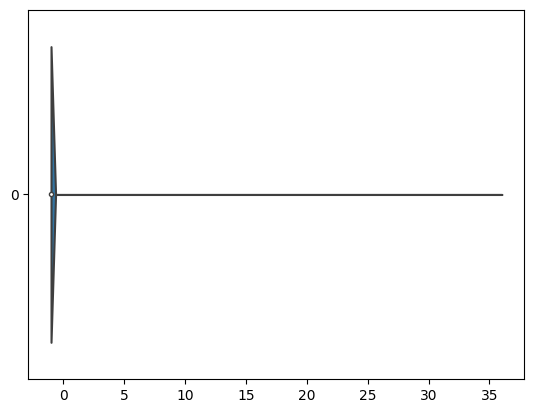

In [151]:
sns.violinplot(dfhc[a], orient='h')

In [152]:
dfhc.dtypes

customerId                   object
Tonikloanid                  object
CBContract                   object
run_date                     dbdate
ContractInstallmentType      object
Guarantee_validityinMonth     int64
dtype: object

In [153]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [154]:
dfhc[a].unique()

array([-1, 24, 12,  6,  3, 18, 10,  2,  9,  5, 36,  4], dtype=int64)

In [155]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [156]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Guarantee_validityinMonth,Guarantee_validityinMonth_bin
334055,1889359,33da11ba-f12d-439b-b88f-4ef46df10d39,A04511979,2023-02-06,NotGranted,-1,Very Low
504445,2259640,80dd4e54-dc2b-427a-ba71-1ed49e037a3e,R04987139,2023-10-04,Granted,-1,Very Low
6274,2410060,7dd1ade3-6f9e-4754-b729-25aade569ff3,B05914679,2024-02-24,Granted,-1,Very Low
351058,1837778,4a28ac2f-2d1a-44ca-80c3-8313ed75fce8,I05478128,2024-01-16,Granted,-1,Very Low
53933,2248628,521aa5f0-c3ff-4f19-b691-e7223351bd5c,R04823146,2023-09-26,NotGranted,-1,Very Low
591181,1937380,7150a814-211e-49b4-ab2d-7ad7824b2cfc,003721639,2023-03-18,Granted,-1,Very Low
68028,1913153,543264ba-849d-4651-bac2-a48bb4ec8db5,I04137768,2023-02-23,Granted,-1,Very Low
198769,2186459,d8385716-dac2-4542-85c5-6f8e7a1a3870,803772892,2023-08-13,Granted,-1,Very Low
359026,2025982,3f22e8c7-d1aa-4666-8b9b-55f598aad5de,R03510316,2023-05-03,Granted,-1,Very Low
378278,1390158,aa7b72b5-99b3-45ec-9a9b-73e96eaee502,F03551292,2023-03-01,Granted,-1,Very Low


In [157]:
dfhc[a].value_counts()

-1     679416
 12        35
 3         22
 24        16
 18         9
 6          8
 5          8
 2          5
 10         2
 4          2
 9          1
 36         1
Name: Guarantee_validityinMonth, dtype: int64

In [158]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max6      679461
Low_Min9_Max12               38
High_Min24_Max24             16
Medium_Min18_Max18            9
Very High_Min36_Max36         1
Name: Guarantee_validityinMonth_bin, dtype: int64

In [159]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='Guarantee_validityinMonth_bin', ylabel='Count'>

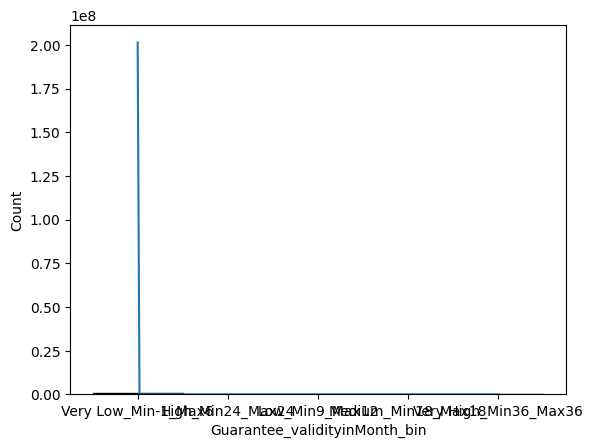

In [160]:
sns.histplot(dfhc[b], kde = True)

In [161]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customerId                     679525 non-null  object
 1   Tonikloanid                    679525 non-null  object
 2   CBContract                     679525 non-null  object
 3   run_date                       679525 non-null  dbdate
 4   ContractInstallmentType        679525 non-null  object
 5   Guarantee_validityinMonth      679525 non-null  int64 
 6   Guarantee_validityinMonth_bin  679525 non-null  object
dtypes: dbdate(1), int64(1), object(5)
memory usage: 36.3+ MB


In [162]:
dfhc[b] = dfhc[b].astype(str)

In [163]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Guarantee_validityinMonth,Guarantee_validityinMonth_bin,joint
613761,2107918,cc4d699a-44b0-437c-91e7-7204d015768f,D02589663,2023-06-25,Granted,-1,Very Low_Min-1_Max6,Granted_Very Low_Min-1_Max6
154740,2098865,bdf6e432-9a79-4cc6-a6f4-e7320cafc380,L04548573,2024-01-17,Granted,-1,Very Low_Min-1_Max6,Granted_Very Low_Min-1_Max6
356161,1833011,acf90628-1bbd-443c-901c-70e0f4f174a7,A00453877,2023-09-23,Granted,-1,Very Low_Min-1_Max6,Granted_Very Low_Min-1_Max6
8096,2201869,0a2cda9c-9d66-4a95-996f-a76f0d27644f,S03968105,2023-08-22,Granted,-1,Very Low_Min-1_Max6,Granted_Very Low_Min-1_Max6
233197,1710211,44f98b2c-9432-4a6b-a6fb-c78c8a0a5d41,Q02364875,2023-01-12,Granted,-1,Very Low_Min-1_Max6,Granted_Very Low_Min-1_Max6
598246,1584191,192ab22b-21d5-47a5-a000-cc51659508a0,R03910730,2023-09-29,Granted,-1,Very Low_Min-1_Max6,Granted_Very Low_Min-1_Max6


In [164]:
dfhc.joint.value_counts()

Granted_Very Low_Min-1_Max6       591575
NotGranted_Very Low_Min-1_Max6     87886
Granted_Low_Min9_Max12                38
Granted_High_Min24_Max24              16
Granted_Medium_Min18_Max18             9
Granted_Very High_Min36_Max36          1
Name: joint, dtype: int64

In [165]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract                         \
joint      Granted_High_Min24_Max24 Granted_Low_Min9_Max12   
customerId                                                   
1473815                         NaN                    NaN   
1984000                         NaN                    NaN   
1518910                         NaN                    NaN   
1863426                         NaN                    NaN   
2286418                         NaN                    NaN   

                                                                     \
joint      Granted_Medium_Min18_Max18 Granted_Very High_Min36_Max36   
customerId                                                            
1473815                           NaN                           NaN   
1984000                           NaN                           NaN   
1518910                           NaN                           NaN   
1863426                           NaN                           NaN   
2286418                           NaN                           NaN   

                                                                       \
joint      Granted_Very Low_Min-1_Max6 NotGranted_Very Low_Min-1_Max6   
customerId                                                              
1473815                            1.0                            NaN   
1984000                            1.0                            NaN   
1518910                           16.0                            4.0   
1863426                            7.0                            1.0   
2286418                            NaN                            1.0   

                        Tonikloanid                         \
joint      Granted_High_Min24_Max24 Granted_Low_Min9_Max12   
customerId                                                   
1473815                         NaN                    NaN   
1984000                         NaN                    NaN   
1518910                         NaN                    NaN   
1863426                         NaN                    NaN   
2286418                         NaN                    NaN   

                                                                     \
joint      Granted_Medium_Min18_Max18 Granted_Very High_Min36_Max36   
customerId                                                            
1473815                           NaN                           NaN   
1984000                           NaN                           NaN   
1518910                           NaN                           NaN   
1863426                           NaN                           NaN   
2286418                           NaN                           NaN   

                                                                       
joint      Granted_Very Low_Min-1_Max6 NotGranted_Very Low_Min-1_Max6  
customerId                                                             
1473815                            1.0                            NaN  
1984000                            1.0                            NaN  
1518910                            1.0                            1.0  
1863426                            1.0                            1.0  
2286418                            NaN                            1.0

In [166]:
result_pivot.columns.value_counts()

(CBContract, Granted_High_Min24_Max24)           1
(CBContract, Granted_Low_Min9_Max12)             1
(CBContract, Granted_Medium_Min18_Max18)         1
(CBContract, Granted_Very High_Min36_Max36)      1
(CBContract, Granted_Very Low_Min-1_Max6)        1
(CBContract, NotGranted_Very Low_Min-1_Max6)     1
(Tonikloanid, Granted_High_Min24_Max24)          1
(Tonikloanid, Granted_Low_Min9_Max12)            1
(Tonikloanid, Granted_Medium_Min18_Max18)        1
(Tonikloanid, Granted_Very High_Min36_Max36)     1
(Tonikloanid, Granted_Very Low_Min-1_Max6)       1
(Tonikloanid, NotGranted_Very Low_Min-1_Max6)    1
dtype: int64

In [167]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',       'Granted_High_Min24_Max24'),
            ( 'CBContract',         'Granted_Low_Min9_Max12'),
            ( 'CBContract',     'Granted_Medium_Min18_Max18'),
            ( 'CBContract',  'Granted_Very High_Min36_Max36'),
            ( 'CBContract',    'Granted_Very Low_Min-1_Max6'),
            ( 'CBContract', 'NotGranted_Very Low_Min-1_Max6'),
            ('Tonikloanid',       'Granted_High_Min24_Max24'),
            ('Tonikloanid',         'Granted_Low_Min9_Max12'),
            ('Tonikloanid',     'Granted_Medium_Min18_Max18'),
            ('Tonikloanid',  'Granted_Very High_Min36_Max36'),
            ('Tonikloanid',    'Granted_Very Low_Min-1_Max6'),
            ('Tonikloanid', 'NotGranted_Very Low_Min-1_Max6')],
           names=[None, 'joint'])

In [168]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,Guarantee_validityinMonth_CBContract_Granted_High_Min24_Max24,Guarantee_validityinMonth_CBContract_Granted_Low_Min9_Max12,Guarantee_validityinMonth_CBContract_Granted_Medium_Min18_Max18,Guarantee_validityinMonth_CBContract_Granted_Very High_Min36_Max36,Guarantee_validityinMonth_CBContract_Granted_Very Low_Min-1_Max6,Guarantee_validityinMonth_CBContract_NotGranted_Very Low_Min-1_Max6,Guarantee_validityinMonth_Tonikloanid_Granted_High_Min24_Max24,Guarantee_validityinMonth_Tonikloanid_Granted_Low_Min9_Max12,Guarantee_validityinMonth_Tonikloanid_Granted_Medium_Min18_Max18,Guarantee_validityinMonth_Tonikloanid_Granted_Very High_Min36_Max36,Guarantee_validityinMonth_Tonikloanid_Granted_Very Low_Min-1_Max6,Guarantee_validityinMonth_Tonikloanid_NotGranted_Very Low_Min-1_Max6
0,1000001,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0
1,1000085,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,29.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,38.0,10.0,NaN,NaN,NaN,NaN,3.0,3.0


In [169]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [170]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [171]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [172]:
df.to_csv("cicdata_20240226.csv", index = False)

In [173]:
df_result.to_csv(f"{a}.csv")

In [174]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 573)
The size of df is:	56209581
the number of dimensions of df is:	2


# Leasing_GoodValue


In [201]:
a = 'Leasing_GoodValue'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, CBContractCode CBContract, run_date, coalesce(ContractInstallmentType, 'NA')ContractInstallmentType,
coalesce({a}, '-1') {a}
--date_diff(date(Guarantee_ValidityEndDate), date({a}), Month) {a}
from dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_historycontracts;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 0d87dcf7-7c95-4a52-b8ef-aba81b20a1c2 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(679525, 6)

In [202]:
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Leasing_GoodValue
477834,1833586,2c9d4697-1375-4b69-a727-05ae29458a1f,G02551824,2022-12-23,Granted,-1
276811,2054308,cc8f347a-e061-430d-95d9-2dc13b7fbf2c,Q00617534,2023-05-21,Granted,-1
24793,1845304,7a4a55ed-3ad1-4a1b-a258-3defa41c4613,304696460,2023-07-20,Granted,-1
108820,2287644,84b7bb82-2dc2-49d7-a9c1-85602012a18b,703843521,2024-02-14,Granted,20000
320854,2124148,20c46da3-e51d-496b-a6b4-9021db654c69,M03820537,2023-07-08,Granted,-1
523348,2359039,05b1e5f3-8baf-4939-b656-ec2346ee5d03,502764027,2024-01-05,Granted,-1


In [203]:
dfhc[a] = dfhc[a].fillna(-1)

In [204]:
# dfhc.rename(columns = {a:'Guarantee_validityinMonth'}, inplace = True)

In [205]:
# a = 'Guarantee_validityinMonth'

In [206]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
Leasing_GoodValue          object
dtype: object

In [207]:
dfhc[a].describe()

count     679525
unique     11186
top           -1
freq      621815
Name: Leasing_GoodValue, dtype: object

In [208]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

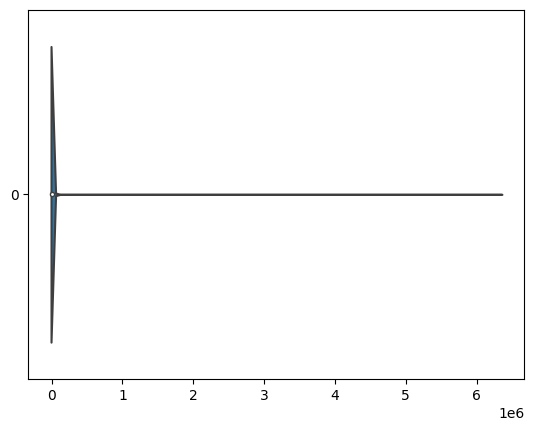

In [209]:
sns.violinplot(dfhc[a], orient='h')

In [210]:
dfhc.dtypes

customerId                 object
Tonikloanid                object
CBContract                 object
run_date                   dbdate
ContractInstallmentType    object
Leasing_GoodValue           int64
dtype: object

In [211]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [212]:
dfhc[a].unique()

array([   -1, 14195, 12877, ..., 15787,  9814,  9416], dtype=int64)

In [215]:
import pandas as pd

# Create 5 bins with labels
num_bins = 5
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
a1 ='bin'
a2 = "labels"
b = f'{a}_{a1}'
# Perform binning using pandas cut
dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [216]:
dfhc.sample(10)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Leasing_GoodValue,Leasing_GoodValue_bin
536376,1999484,ca2686f3-6244-4d0a-9aa3-305ec94aaa93,204008102,2023-04-19,NotGranted,-1,Very Low
379914,1804156,86d38e59-fb4f-456e-ae6f-9d26b26d79de,201086575,2023-03-12,Granted,-1,Very Low
427381,1135083,c550aee4-bd7e-467a-a234-f7b26cad7fd5,903051147,2023-10-05,Granted,-1,Very Low
136321,1077221,289e6164-6527-4582-8c77-9ac8881d0d4e,P03696299,2023-01-27,Granted,-1,Very Low
243223,1288472,e0a9819c-eace-4d06-8aaa-964f0c244cb7,G04662081,2023-08-31,NotGranted,-1,Very Low
171140,2031894,71063f20-b00a-420d-b941-2438501ec6d6,L02370211,2023-05-07,NotGranted,-1,Very Low
408629,2364925,cb635182-1e54-4449-99e0-858a801f0945,J02926432,2024-01-10,Granted,-1,Very Low
138340,1203410,dee3ede7-1384-4651-ab51-2d6134603848,304720847,2023-12-04,NotGranted,-1,Very Low
79524,2257612,2b737aca-6f5b-4c5f-a935-4366fa4bcb79,K05256804,2024-02-04,NotGranted,-1,Very Low
587089,1982504,ae1d0ca7-5341-4ef6-b5ca-6c7ba251b6ab,604668984,2023-04-07,Granted,-1,Very Low


In [217]:
dfhc[b].value_counts()

Very Low     679283
Low             228
Medium            6
High              4
Very High         4
Name: Leasing_GoodValue_bin, dtype: int64

In [218]:
min_scores = dfhc.groupby(b)[a].transform('min')
max_scores = dfhc.groupby(b)[a].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[b].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

Very Low_Min-1_Max1265000          679283
Low_Min1275000_Max2509000             228
Medium_Min3020000_Max3478567            6
High_Min4175000_Max5000000              4
Very High_Min5512744_Max6349760         4
Name: Leasing_GoodValue_bin, dtype: int64

In [219]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='Leasing_GoodValue_bin', ylabel='Count'>

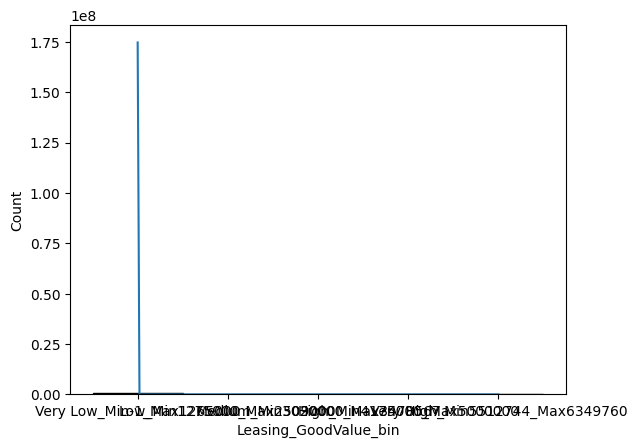

In [220]:
sns.histplot(dfhc[b], kde = True)

In [221]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679525 entries, 0 to 679524
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   customerId               679525 non-null  object
 1   Tonikloanid              679525 non-null  object
 2   CBContract               679525 non-null  object
 3   run_date                 679525 non-null  dbdate
 4   ContractInstallmentType  679525 non-null  object
 5   Leasing_GoodValue        679525 non-null  int64 
 6   Leasing_GoodValue_bin    679525 non-null  object
dtypes: dbdate(1), int64(1), object(5)
memory usage: 36.3+ MB


In [222]:
dfhc[b] = dfhc[b].astype(str)

In [223]:
dfhc['joint'] = dfhc['ContractInstallmentType']+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,CBContract,run_date,ContractInstallmentType,Leasing_GoodValue,Leasing_GoodValue_bin,joint
510938,1999171,4ec0e460-8495-47f3-b4c8-b09d7f33987f,M03570781,2023-04-17,Granted,-1,Very Low_Min-1_Max1265000,Granted_Very Low_Min-1_Max1265000
545900,2388807,961b2607-a9da-4959-8b4c-5b31e9eb7b16,803767961,2024-02-03,Granted,-1,Very Low_Min-1_Max1265000,Granted_Very Low_Min-1_Max1265000
490048,2262635,76515e67-5fe9-4ff8-979a-516d5fde92a5,D04335518,2023-10-06,NotGranted,-1,Very Low_Min-1_Max1265000,NotGranted_Very Low_Min-1_Max1265000
444644,2398381,9fa09b38-7fef-4160-9a6d-f8692df301bf,A06046827,2024-02-12,Granted,-1,Very Low_Min-1_Max1265000,Granted_Very Low_Min-1_Max1265000
652558,2129312,785413f0-f689-4a9f-b6ec-ac0426dd5d44,P00364394,2023-07-21,Granted,-1,Very Low_Min-1_Max1265000,Granted_Very Low_Min-1_Max1265000
632863,1902774,c7072606-3436-435a-86a9-a939d88c3ad9,B04600510,2023-02-16,Granted,-1,Very Low_Min-1_Max1265000,Granted_Very Low_Min-1_Max1265000


In [224]:
dfhc.joint.value_counts()

Granted_Very Low_Min-1_Max1265000          591397
NotGranted_Very Low_Min-1_Max1265000        87886
Granted_Low_Min1275000_Max2509000             228
Granted_Medium_Min3020000_Max3478567            6
Granted_High_Min4175000_Max5000000              4
Granted_Very High_Min5512744_Max6349760         4
Name: joint, dtype: int64

In [225]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid', 'CBContract'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


CBContract  \
joint      Granted_High_Min4175000_Max5000000   
customerId                                      
1327809                                   NaN   
2052775                                   NaN   
2389908                                   NaN   
2364060                                   NaN   
2014875                                   NaN   

                                              \
joint      Granted_Low_Min1275000_Max2509000   
customerId                                     
1327809                                  NaN   
2052775                                  NaN   
2389908                                  NaN   
2364060                                  NaN   
2014875                                  NaN   

                                                 \
joint      Granted_Medium_Min3020000_Max3478567   
customerId                                        
1327809                                     NaN   
2052775                                     NaN   
2389908                                     NaN   
2364060                                     NaN   
2014875                                     NaN   

                                                    \
joint      Granted_Very High_Min5512744_Max6349760   
customerId                                           
1327809                                        NaN   
2052775                                        NaN   
2389908                                        NaN   
2364060                                        NaN   
2014875                                        NaN   

                                              \
joint      Granted_Very Low_Min-1_Max1265000   
customerId                                     
1327809                                  NaN   
2052775                                  1.0   
2389908                                  1.0   
2364060                                  6.0   
2014875                                  1.0   

                                                 \
joint      NotGranted_Very Low_Min-1_Max1265000   
customerId                                        
1327809                                     1.0   
2052775                                     5.0   
2389908                                     NaN   
2364060                                     NaN   
2014875                                     NaN   

                                  Tonikloanid  \
joint      Granted_High_Min4175000_Max5000000   
customerId                                      
1327809                                   NaN   
2052775                                   NaN   
2389908                                   NaN   
2364060                                   NaN   
2014875                                   NaN   

                                              \
joint      Granted_Low_Min1275000_Max2509000   
customerId                                     
1327809                                  NaN   
2052775                                  NaN   
2389908                                  NaN   
2364060                                  NaN   
2014875                                  NaN   

                                                 \
joint      Granted_Medium_Min3020000_Max3478567   
customerId                                        
1327809                                     NaN   
2052775                                     NaN   
2389908                                     NaN   
2364060                                     NaN   
2014875                                     NaN   

                                                    \
joint      Granted_Very High_Min5512744_Max6349760   
customerId                                           
1327809                                        NaN   
2052775                                        NaN   
2389908                                        NaN   
2364060                                        NaN   
2014875                                        NaN   

 

In [226]:
result_pivot.columns.value_counts()

(CBContract, Granted_High_Min4175000_Max5000000)          1
(CBContract, Granted_Low_Min1275000_Max2509000)           1
(CBContract, Granted_Medium_Min3020000_Max3478567)        1
(CBContract, Granted_Very High_Min5512744_Max6349760)     1
(CBContract, Granted_Very Low_Min-1_Max1265000)           1
(CBContract, NotGranted_Very Low_Min-1_Max1265000)        1
(Tonikloanid, Granted_High_Min4175000_Max5000000)         1
(Tonikloanid, Granted_Low_Min1275000_Max2509000)          1
(Tonikloanid, Granted_Medium_Min3020000_Max3478567)       1
(Tonikloanid, Granted_Very High_Min5512744_Max6349760)    1
(Tonikloanid, Granted_Very Low_Min-1_Max1265000)          1
(Tonikloanid, NotGranted_Very Low_Min-1_Max1265000)       1
dtype: int64

In [227]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([( 'CBContract',      'Granted_High_Min4175000_Max5000000'),
            ( 'CBContract',       'Granted_Low_Min1275000_Max2509000'),
            ( 'CBContract',    'Granted_Medium_Min3020000_Max3478567'),
            ( 'CBContract', 'Granted_Very High_Min5512744_Max6349760'),
            ( 'CBContract',       'Granted_Very Low_Min-1_Max1265000'),
            ( 'CBContract',    'NotGranted_Very Low_Min-1_Max1265000'),
            ('Tonikloanid',      'Granted_High_Min4175000_Max5000000'),
            ('Tonikloanid',       'Granted_Low_Min1275000_Max2509000'),
            ('Tonikloanid',    'Granted_Medium_Min3020000_Max3478567'),
            ('Tonikloanid', 'Granted_Very High_Min5512744_Max6349760'),
            ('Tonikloanid',       'Granted_Very Low_Min-1_Max1265000'),
            ('Tonikloanid',    'NotGranted_Very Low_Min-1_Max1265000')],
           names=[None, 'joint'])

In [228]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,Leasing_GoodValue_CBContract_Granted_High_Min4175000_Max5000000,Leasing_GoodValue_CBContract_Granted_Low_Min1275000_Max2509000,Leasing_GoodValue_CBContract_Granted_Medium_Min3020000_Max3478567,Leasing_GoodValue_CBContract_Granted_Very High_Min5512744_Max6349760,Leasing_GoodValue_CBContract_Granted_Very Low_Min-1_Max1265000,Leasing_GoodValue_CBContract_NotGranted_Very Low_Min-1_Max1265000,Leasing_GoodValue_Tonikloanid_Granted_High_Min4175000_Max5000000,Leasing_GoodValue_Tonikloanid_Granted_Low_Min1275000_Max2509000,Leasing_GoodValue_Tonikloanid_Granted_Medium_Min3020000_Max3478567,Leasing_GoodValue_Tonikloanid_Granted_Very High_Min5512744_Max6349760,Leasing_GoodValue_Tonikloanid_Granted_Very Low_Min-1_Max1265000,Leasing_GoodValue_Tonikloanid_NotGranted_Very Low_Min-1_Max1265000
0,1000001,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0
1,1000085,NaN,NaN,NaN,NaN,13.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0
2,1000192,NaN,NaN,NaN,NaN,12.0,3.0,NaN,NaN,NaN,NaN,2.0,2.0
3,1000243,NaN,NaN,NaN,NaN,29.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
4,1000278,NaN,NaN,NaN,NaN,38.0,10.0,NaN,NaN,NaN,NaN,3.0,3.0


In [229]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [230]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [231]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [232]:
df.to_csv("cicdata_20240226.csv", index = False)

In [233]:
df_result.to_csv(f"{a}.csv")

In [234]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 585)
The size of df is:	57386745
the number of dimensions of df is:	2


In [307]:
dfd = pd.read_csv(r"D:\OneDrive - Tonik Financial Pte Ltd\MyStuff\Data Science\Gaurav Mandolia\CIC Data Analysis\cicdata_20240226.csv")
dfd.shape

(98097, 585)

# Getting the base query ready with CustomerId the common column

`CRITERIA`<BR>
Only for quick loans and for customers with disbursed loan after 2023-01-01 and obsTPD30 = 1

In [310]:
sq = """with customerbase as 
(select customerId, loanAccountNumber, disbursementDateTime, 
row_number() over (partition by customerId order by disbursementDateTime desc) rnk
from `risk_credit_mis.loan_master_table` where flagDisbursement = 1 and date_trunc(disbursementDateTime, day) >= '2023-01-01'
and upper(new_loan_type) = 'QUICK'),
fstpd as
(select lmt.customerId, lmt.loanAccountNumber, lmt.new_loan_type,
sum(case when obsTPD30 = 1
     then case when defFPD30 = 1 then 1
     when defSPD30 = 1 then 1
     when defTPD30 = 1 then 1
     else 0 end else 0 end) FPSTPD30 ,
sum(obsTPD30) obsTPD30,
max(cb.rnk) rnk
 from `risk_credit_mis.loan_master_table` lmt
 inner join customerbase cb on cb.customerId = lmt.customerId and lmt.loanAccountNumber = cb.loanAccountNumber
 WHERE 
  date_trunc(lmt.disbursementDateTime, day) >= '2023-01-01' and upper(lmt.new_loan_type) = 'QUICK'
 group by 1,2,3
),
modelpopulationbase as
(select customerId,new_loan_type,count(distinct loanAccountNumber) cnt_loans
, sum(obsTPD30) obs
, sum(FPSTPD30)FSTPD30 
from fstpd where obsTPD30 = 1 group by 1,2
) 
select customerId,new_loan_type,
max(case when obs > 0 then 1 else 0 end) obs ,
max(case when FSTPD30 > 0 then 1 else 0 end) fstpd30
from modelpopulationbase 
group by 1, 2
;
"""

In [311]:
base = client.query(sq).to_dataframe(progress_bar_type='tqdm')
print(f"The rows and columns downloaded after running the above query are:\n{base.shape}")

Job ID 83fa2dad-6bdb-4c26-a77d-33cf44600f9d successfully executed: 100%|██████████|
Downloading: 100%|██████████|
The rows and columns downloaded after running the above query are:
(17683, 4)


In [312]:
base.head()

,customerId,new_loan_type,obs,fstpd30
0,2144563,Quick,1,0
1,1703454,Quick,1,0
2,1984481,Quick,1,0
3,2128895,Quick,1,0
4,1954098,Quick,1,0


In [313]:
base['customerId'] = base['customerId'].astype(np.int64)

NameError: name 'dfgrantedcontractcnt' is not defined

# ScoreRange


In [259]:
a = 'ScoreRange'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, run_date, 
coalesce({a}, 'NA') {a}, ScoreRaw
FROM `prj-prod-dataplatform.dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_summary` ;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID c4df607e-c523-4bd0-a77e-624248c08ca8 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(239144, 5)

In [260]:
dfhc.sample(6)

,customerId,Tonikloanid,run_date,ScoreRange,ScoreRaw
67645,2234193,1a58f885-75e8-4135-ab91-9cfaa6a1a45c,2023-09-15,NA,None
228829,2379617,e86f8cef-c933-4aa1-905a-7ac09de4dca0,2024-01-26,NA,None
211013,1888443,8f69be95-e2e3-4e62-a2a8-3c49dae7aa6a,2023-02-06,NA,None
42695,2406447,a399cfde-09f1-4e2d-aafc-0feea1fb555d,2024-02-20,NA,None
34024,1694765,4fd61e53-c657-493f-9893-ddf7f91351ce,2023-01-22,NA,None
27104,2216249,624751c8-d113-4adc-a941-804cc31de823,2023-09-09,Fi,459


In [261]:
# Check for duplicate digitalLoanAccountId
has_duplicates = dfhc['Tonikloanid'].duplicated()

# Get the actual duplicate loan ids
duplicate_ids = dfhc[has_duplicates]['Tonikloanid']

# Print the duplicate loan ids
if duplicate_ids.empty:
    print("There are no duplicate digitalLoanAccountId in the dataframe.")
else:
    print("The following digitalLoanAccountId are duplicates:")
    print(duplicate_ids[0:5].tolist())

The following digitalLoanAccountId are duplicates:
['cd548f90-a0ad-41ac-8a71-11faa561c3fc', 'a6f87d95-b8fd-4d69-9227-37463a899914', '0b88cc32-cb43-45f4-ad19-e9a3770a924a', '93573234-df87-4852-90fa-8778e40d9fdc', 'e2b4ca61-7bfe-4213-bd65-70b5f0022b84']


In [262]:
dfhc[dfhc['Tonikloanid'] == 'fefd16e5-50ce-4376-ad4c-6e17dabe367f']

,customerId,Tonikloanid,run_date,ScoreRange,ScoreRaw
20893,1977395,fefd16e5-50ce-4376-ad4c-6e17dabe367f,2023-04-04,Fi,459
155088,1977395,fefd16e5-50ce-4376-ad4c-6e17dabe367f,2023-04-04,NA,None


In [263]:
# dfhc[a] = dfhc[a].fillna(-1)

In [264]:
# dfhc.rename(columns = {a:'Guarantee_validityinMonth'}, inplace = True)

In [265]:
# a = 'Guarantee_validityinMonth'

In [266]:
dfhc.dtypes

customerId     object
Tonikloanid    object
run_date       dbdate
ScoreRange     object
ScoreRaw       object
dtype: object

In [267]:
dfhc[a].describe()

count     239144
unique        10
top           NA
freq      184875
Name: ScoreRange, dtype: object

In [268]:
# dfhc[a] = dfhc[a].astype(np.int64)

In [269]:
# sns.violinplot(dfhc[a], orient='h')

In [270]:
dfhc.dtypes

customerId     object
Tonikloanid    object
run_date       dbdate
ScoreRange     object
ScoreRaw       object
dtype: object

In [271]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [272]:
dfhc[a].unique()

array(['NA', 'Bi', 'Ci', 'Fi', 'Gi', 'Di', 'Ei', 'Ii', 'Hi', 'Ji'],
      dtype=object)

In [273]:
# import pandas as pd

# # Create 5 bins with labels
# num_bins = 5
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# # Perform binning using pandas cut
# dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [274]:
dfhc.sample(10)

,customerId,Tonikloanid,run_date,ScoreRange,ScoreRaw
213306,1674002,27ae912b-b9bc-41cf-8b10-2bdff04f40bb,2023-04-18,Fi,459
80734,1998421,575445c2-4687-4558-b986-ac56d427be77,2023-08-19,NA,None
130093,2095194,161e8598-4c99-467e-89e5-331cae490ca9,2023-06-16,NA,None
137829,1843989,8b4e06a4-92c9-49e5-9860-2b6b915a350b,2023-09-11,NA,None
209738,2195157,2d9831d3-869c-42fd-82ec-ee00e819c2d8,2023-08-18,NA,None
160490,2289993,5cf72af1-0298-473a-b631-12106c02c21d,2023-10-31,NA,None
224147,2252832,ea22538d-1c12-468d-8bea-b9e098b1bae1,2023-09-29,NA,None
156986,2198352,87c5763d-8b27-4ed0-b743-6ef1fc646bbb,2023-08-20,NA,None
127878,2038349,363e8fcd-ff53-4bb7-b4e4-f53200c81c4f,2023-05-10,Bi,328
102954,1415363,2e845f34-a38c-4e20-97ed-16008c361f08,2023-04-06,Fi,465


In [275]:
dfhc[a].value_counts()

NA    184875
Bi     16162
Ci      9003
Fi      8741
Ei      6497
Di      5701
Gi      4311
Ji      1568
Ii      1518
Hi       768
Name: ScoreRange, dtype: int64

In [276]:
min_scores = dfhc.groupby(a)['ScoreRaw'].transform('min')
max_scores = dfhc.groupby(a)['ScoreRaw'].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[a].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

NA_Minnan_Maxnan    184875
Bi_Min151_Max345     16162
Ci_Min346_Max398      9003
Fi_Min451_Max466      8741
Ei_Min430_Max450      6497
Di_Min399_Max429      5701
Gi_Min467_Max476      4311
Ji_Min497_Max540      1568
Ii_Min486_Max494      1518
Hi_Min477_Max485       768
Name: Leasing_GoodValue_bin, dtype: int64

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='Leasing_GoodValue_bin', ylabel='Count'>

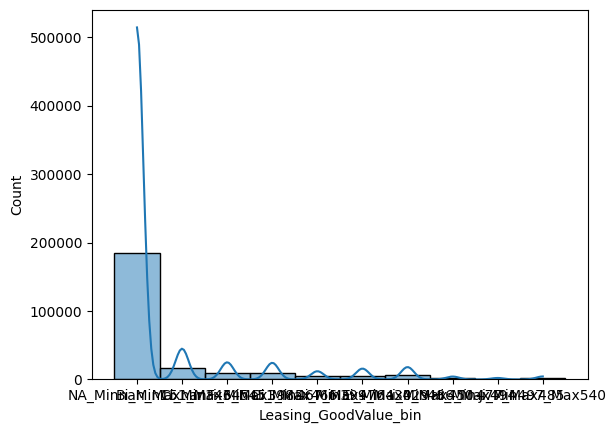

In [277]:
sns.histplot(dfhc[b], kde = True)

In [278]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239144 entries, 0 to 239143
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customerId             239144 non-null  object
 1   Tonikloanid            239144 non-null  object
 2   run_date               239144 non-null  dbdate
 3   ScoreRange             239144 non-null  object
 4   ScoreRaw               54269 non-null   object
 5   Leasing_GoodValue_bin  239144 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 10.9+ MB


In [279]:
dfhc[b] = dfhc[b].astype(str)

In [280]:
dfhc['joint'] = 'Summary'+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,run_date,ScoreRange,ScoreRaw,Leasing_GoodValue_bin,joint
18642,2074735,bc8d6188-3f57-49c1-8932-bde22020b3b1,2023-06-03,Ci,355,Ci_Min346_Max398,Summary_Ci_Min346_Max398
193791,1449401,f8d0159b-ca15-4039-a24b-6d4d219e48aa,2023-05-18,Di,407,Di_Min399_Max429,Summary_Di_Min399_Max429
218422,2204667,499facc3-6b9c-4805-83d1-8e4ff6885605,2023-08-23,NA,None,NA_Minnan_Maxnan,Summary_NA_Minnan_Maxnan
233260,2323981,fd4ee3f4-4c1f-4f67-8327-59402eaef75d,2023-12-05,NA,None,NA_Minnan_Maxnan,Summary_NA_Minnan_Maxnan
34119,2290212,24d19517-1cfd-4539-be50-b0b4f89b899c,2023-11-01,NA,None,NA_Minnan_Maxnan,Summary_NA_Minnan_Maxnan
70667,2256908,717d50d1-7d3b-4737-b79e-0571e585943a,2023-10-02,Bi,308,Bi_Min151_Max345,Summary_Bi_Min151_Max345


In [281]:
dfhc.joint.value_counts()

Summary_NA_Minnan_Maxnan    184875
Summary_Bi_Min151_Max345     16162
Summary_Ci_Min346_Max398      9003
Summary_Fi_Min451_Max466      8741
Summary_Ei_Min430_Max450      6497
Summary_Di_Min399_Max429      5701
Summary_Gi_Min467_Max476      4311
Summary_Ji_Min497_Max540      1568
Summary_Ii_Min486_Max494      1518
Summary_Hi_Min477_Max485       768
Name: joint, dtype: int64

In [282]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


Tonikloanid                           \
joint      Summary_Bi_Min151_Max345 Summary_Ci_Min346_Max398   
customerId                                                     
2111351                         1.0                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              \
joint      Summary_Di_Min399_Max429 Summary_Ei_Min430_Max450   
customerId                                                     
2111351                         NaN                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              \
joint      Summary_Fi_Min451_Max466 Summary_Gi_Min467_Max476   
customerId                                                     
2111351                         NaN                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              \
joint      Summary_Hi_Min477_Max485 Summary_Ii_Min486_Max494   
customerId                                                     
2111351                         NaN                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              
joint      Summary_Ji_Min497_Max540 Summary_NA_Minnan_Maxnan  
customerId                                                    
2111351                         NaN                      NaN  
1833340                         NaN                      2.0  
2225178                         NaN                      1.0  
2265363                         NaN                      1.0  
2335456                         NaN                      1.0

In [283]:
result_pivot.columns.value_counts()

(Tonikloanid, Summary_Bi_Min151_Max345)    1
(Tonikloanid, Summary_Ci_Min346_Max398)    1
(Tonikloanid, Summary_Di_Min399_Max429)    1
(Tonikloanid, Summary_Ei_Min430_Max450)    1
(Tonikloanid, Summary_Fi_Min451_Max466)    1
(Tonikloanid, Summary_Gi_Min467_Max476)    1
(Tonikloanid, Summary_Hi_Min477_Max485)    1
(Tonikloanid, Summary_Ii_Min486_Max494)    1
(Tonikloanid, Summary_Ji_Min497_Max540)    1
(Tonikloanid, Summary_NA_Minnan_Maxnan)    1
dtype: int64

In [284]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([('Tonikloanid', 'Summary_Bi_Min151_Max345'),
            ('Tonikloanid', 'Summary_Ci_Min346_Max398'),
            ('Tonikloanid', 'Summary_Di_Min399_Max429'),
            ('Tonikloanid', 'Summary_Ei_Min430_Max450'),
            ('Tonikloanid', 'Summary_Fi_Min451_Max466'),
            ('Tonikloanid', 'Summary_Gi_Min467_Max476'),
            ('Tonikloanid', 'Summary_Hi_Min477_Max485'),
            ('Tonikloanid', 'Summary_Ii_Min486_Max494'),
            ('Tonikloanid', 'Summary_Ji_Min497_Max540'),
            ('Tonikloanid', 'Summary_NA_Minnan_Maxnan')],
           names=[None, 'joint'])

In [285]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ScoreRange_Tonikloanid_Summary_Bi_Min151_Max345,ScoreRange_Tonikloanid_Summary_Ci_Min346_Max398,ScoreRange_Tonikloanid_Summary_Di_Min399_Max429,ScoreRange_Tonikloanid_Summary_Ei_Min430_Max450,ScoreRange_Tonikloanid_Summary_Fi_Min451_Max466,ScoreRange_Tonikloanid_Summary_Gi_Min467_Max476,ScoreRange_Tonikloanid_Summary_Hi_Min477_Max485,ScoreRange_Tonikloanid_Summary_Ii_Min486_Max494,ScoreRange_Tonikloanid_Summary_Ji_Min497_Max540,ScoreRange_Tonikloanid_Summary_NA_Minnan_Maxnan
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
1,1000085,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0
2,1000192,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000243,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1000278,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [287]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [288]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [289]:
df.to_csv("cicdata_20240227.csv", index = False)

In [290]:
df_result.to_csv(f"{a}.csv")

In [291]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 595)
The size of df is:	58367715
the number of dimensions of df is:	2


# NumberOfContract


In [296]:
a = 'NumberOfContract'
sq = f"""select distinct customerId,digitalLoanAccountId Tonikloanid, run_date, 
coalesce({a}, '-1') {a}
FROM `prj-prod-dataplatform.dl_loans_db_derived.tdbk_loan_poi3_response_bureau_string_xml_parsed_summary` ;
"""

dfhc = client.query(sq).to_dataframe(progress_bar_type='tqdm')
dfhc.shape

Job ID 5af738a9-d113-426f-8e9d-9f380ca8727d successfully executed: 100%|██████████|
Downloading: 100%|██████████|


(239162, 4)

In [297]:
dfhc.sample(6)

,customerId,Tonikloanid,run_date,NumberOfContract
15545,2341232,ca314e17-0256-466a-abeb-057dbeda929e,2023-12-23,1
227294,2340505,a886a267-8a05-4068-bf29-9de427137c53,2023-12-20,0
59492,2358276,1f546300-077b-4cd4-8e46-ecf5315ad6b7,2024-01-04,0
36898,2354231,d18ca63e-72ba-48b3-9ef7-94e3aed49cdc,2024-01-02,-1
749,2332788,aa237546-9612-4d8d-a8a7-2a3197f41eed,2023-12-13,1
187216,2408813,d076b3cd-2e3b-4de0-ad7c-fe6ff4342d27,2024-02-23,1


In [298]:
# Check for duplicate digitalLoanAccountId
has_duplicates = dfhc['Tonikloanid'].duplicated()

# Get the actual duplicate loan ids
duplicate_ids = dfhc[has_duplicates]['Tonikloanid']

# Print the duplicate loan ids
if duplicate_ids.empty:
    print("There are no duplicate digitalLoanAccountId in the dataframe.")
else:
    print("The following digitalLoanAccountId are duplicates:")
    print(duplicate_ids[0:5].tolist())

The following digitalLoanAccountId are duplicates:
['300335d7-2281-4191-aa6b-750a2735e6ae', '71c7376d-4622-45c0-97b4-1a3dfcc548ea', 'ba600b95-953b-4876-b40a-35469e67de7e', '8ffadbae-9ed8-4b52-afb5-d3320fc0ace0', '71c407fa-604a-441b-9a4d-baf252a2a1b3']


In [306]:
dfhc[dfhc['Tonikloanid'] == '71c7376d-4622-45c0-97b4-1a3dfcc548ea']

,customerId,Tonikloanid,run_date,NumberOfContract
9047,2290881,71c7376d-4622-45c0-97b4-1a3dfcc548ea,2023-11-01,-1
49713,2290881,71c7376d-4622-45c0-97b4-1a3dfcc548ea,2023-11-01,0


In [300]:
dfhc[a] = dfhc[a].fillna(-1)

In [ ]:
# dfhc.rename(columns = {a:'Guarantee_validityinMonth'}, inplace = True)

In [ ]:
# a = 'Guarantee_validityinMonth'

In [301]:
dfhc.dtypes

customerId          object
Tonikloanid         object
run_date            dbdate
NumberOfContract    object
dtype: object

In [302]:
dfhc[a].describe()

count     239162
unique       101
top            0
freq       96658
Name: NumberOfContract, dtype: object

In [303]:
dfhc[a] = dfhc[a].astype(np.int64)

<AxesSubplot: >

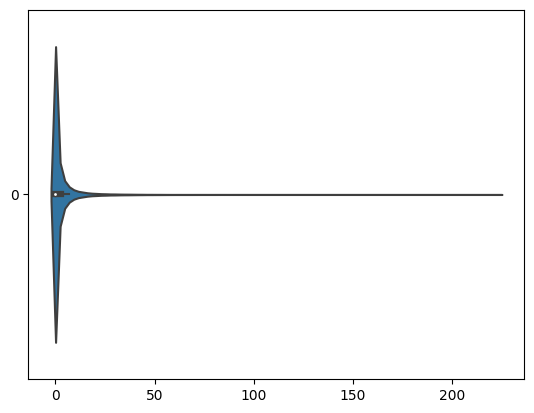

In [304]:
sns.violinplot(dfhc[a], orient='h')

In [305]:
dfhc.dtypes

customerId          object
Tonikloanid         object
run_date            dbdate
NumberOfContract     int64
dtype: object

In [ ]:
# def create_bins(df, column_name, bin_edges, bin_labels):
#     # Create a new column based on the specified bins and labels
#     new_column_name = f'{column_name}_bin'
#     df[new_column_name] = pd.cut(df[column_name], bins=bin_edges, labels=bin_labels, right=False)
#     return df

# # Assuming your dataframe is named 'df'

# # Define bin edges and labels for 'ContractStatus_CV'
# bins_contract_status_cv = [-float('inf'), 0, 25, 55, 75, float('inf')]
# labels_contract_status_cv = ['-1', '0', '1-25', '25-55', '55']


In [ ]:
dfhc[a].unique()

array(['NA', 'Bi', 'Ci', 'Fi', 'Gi', 'Di', 'Ei', 'Ii', 'Hi', 'Ji'],
      dtype=object)

In [ ]:
# import pandas as pd

# # Create 5 bins with labels
# num_bins = 5
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# # Perform binning using pandas cut
# dfhc[b] = pd.cut(dfhc[a], bins=num_bins, labels=bin_labels, precision=3, duplicates='drop')


In [ ]:
dfhc.sample(10)

,customerId,Tonikloanid,run_date,ScoreRange,ScoreRaw
213306,1674002,27ae912b-b9bc-41cf-8b10-2bdff04f40bb,2023-04-18,Fi,459
80734,1998421,575445c2-4687-4558-b986-ac56d427be77,2023-08-19,NA,None
130093,2095194,161e8598-4c99-467e-89e5-331cae490ca9,2023-06-16,NA,None
137829,1843989,8b4e06a4-92c9-49e5-9860-2b6b915a350b,2023-09-11,NA,None
209738,2195157,2d9831d3-869c-42fd-82ec-ee00e819c2d8,2023-08-18,NA,None
160490,2289993,5cf72af1-0298-473a-b631-12106c02c21d,2023-10-31,NA,None
224147,2252832,ea22538d-1c12-468d-8bea-b9e098b1bae1,2023-09-29,NA,None
156986,2198352,87c5763d-8b27-4ed0-b743-6ef1fc646bbb,2023-08-20,NA,None
127878,2038349,363e8fcd-ff53-4bb7-b4e4-f53200c81c4f,2023-05-10,Bi,328
102954,1415363,2e845f34-a38c-4e20-97ed-16008c361f08,2023-04-06,Fi,465


In [ ]:
dfhc[a].value_counts()

NA    184875
Bi     16162
Ci      9003
Fi      8741
Ei      6497
Di      5701
Gi      4311
Ji      1568
Ii      1518
Hi       768
Name: ScoreRange, dtype: int64

In [ ]:
min_scores = dfhc.groupby(a)['ScoreRaw'].transform('min')
max_scores = dfhc.groupby(a)['ScoreRaw'].transform('max')
# Create a new column combining ScoreRange, min(ScoreRaw), and max(ScoreRaw)
dfhc[b] = dfhc[a].astype(str) + '_Min' + min_scores.astype(str) + '_Max' + max_scores.astype(str)
dfhc[b].value_counts()

NA_Minnan_Maxnan    184875
Bi_Min151_Max345     16162
Ci_Min346_Max398      9003
Fi_Min451_Max466      8741
Ei_Min430_Max450      6497
Di_Min399_Max429      5701
Gi_Min467_Max476      4311
Ji_Min497_Max540      1568
Ii_Min486_Max494      1518
Hi_Min477_Max485       768
Name: Leasing_GoodValue_bin, dtype: int64

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming 'cic' is your DataFrame and 'X' is the column you want to bin
# # Replace 'X' with the actual column name if it's different

# # Create an imputer and fit_transform the data
# imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
# X_imputed = imputer.fit_transform(dfhc[[a]])

# # Convert the imputed values to a pandas Series
# X_imputed_series = pd.Series(X_imputed.flatten())
# a1 ='bin'
# a2 = "labels"
# b = f'{a}_{a1}'
# c = f'{a}_{a1}_{a2}'
# # Perform quantile binning using pandas qcut
# num_quantiles = 10
# dfhc[b], bin_edges = pd.qcut(X_imputed_series, q=num_quantiles, labels=False, retbins=True, precision=3, duplicates='drop')

# # Assign bin edges as labels
# label_edges = np.round(bin_edges, 2)
# dfhc[c] = pd.cut(X_imputed_series, bins=bin_edges, labels=[f"{label_edges[i]:.2f}-{label_edges[i+1]:.2f}" for i in range(len(label_edges)-1)])

# # Convert the Category datatype to string
# dfhc[c] = dfhc[c].astype(str)

# # Display the value counts of the new column
# print(dfhc[c].value_counts())


<AxesSubplot: xlabel='Leasing_GoodValue_bin', ylabel='Count'>

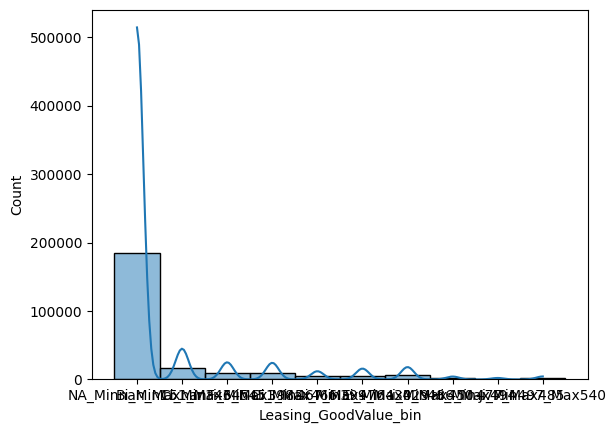

In [ ]:
sns.histplot(dfhc[b], kde = True)

In [ ]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239144 entries, 0 to 239143
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customerId             239144 non-null  object
 1   Tonikloanid            239144 non-null  object
 2   run_date               239144 non-null  dbdate
 3   ScoreRange             239144 non-null  object
 4   ScoreRaw               54269 non-null   object
 5   Leasing_GoodValue_bin  239144 non-null  object
dtypes: dbdate(1), object(5)
memory usage: 10.9+ MB


In [ ]:
dfhc[b] = dfhc[b].astype(str)

In [ ]:
dfhc['joint'] = 'Summary'+'_'+dfhc[b]
dfhc.sample(6)

,customerId,Tonikloanid,run_date,ScoreRange,ScoreRaw,Leasing_GoodValue_bin,joint
18642,2074735,bc8d6188-3f57-49c1-8932-bde22020b3b1,2023-06-03,Ci,355,Ci_Min346_Max398,Summary_Ci_Min346_Max398
193791,1449401,f8d0159b-ca15-4039-a24b-6d4d219e48aa,2023-05-18,Di,407,Di_Min399_Max429,Summary_Di_Min399_Max429
218422,2204667,499facc3-6b9c-4805-83d1-8e4ff6885605,2023-08-23,NA,None,NA_Minnan_Maxnan,Summary_NA_Minnan_Maxnan
233260,2323981,fd4ee3f4-4c1f-4f67-8327-59402eaef75d,2023-12-05,NA,None,NA_Minnan_Maxnan,Summary_NA_Minnan_Maxnan
34119,2290212,24d19517-1cfd-4539-be50-b0b4f89b899c,2023-11-01,NA,None,NA_Minnan_Maxnan,Summary_NA_Minnan_Maxnan
70667,2256908,717d50d1-7d3b-4737-b79e-0571e585943a,2023-10-02,Bi,308,Bi_Min151_Max345,Summary_Bi_Min151_Max345


In [ ]:
dfhc.joint.value_counts()

Summary_NA_Minnan_Maxnan    184875
Summary_Bi_Min151_Max345     16162
Summary_Ci_Min346_Max398      9003
Summary_Fi_Min451_Max466      8741
Summary_Ei_Min430_Max450      6497
Summary_Di_Min399_Max429      5701
Summary_Gi_Min467_Max476      4311
Summary_Ji_Min497_Max540      1568
Summary_Ii_Min486_Max494      1518
Summary_Hi_Min477_Max485       768
Name: joint, dtype: int64

In [ ]:

result_pivot = dfhc.pivot_table(
    index='customerId',
    columns=['joint'],
    values=['Tonikloanid'],
    aggfunc=pd.Series.nunique
)

# Display the result
# 
result_pivot.sample(5)


Tonikloanid                           \
joint      Summary_Bi_Min151_Max345 Summary_Ci_Min346_Max398   
customerId                                                     
2111351                         1.0                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              \
joint      Summary_Di_Min399_Max429 Summary_Ei_Min430_Max450   
customerId                                                     
2111351                         NaN                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              \
joint      Summary_Fi_Min451_Max466 Summary_Gi_Min467_Max476   
customerId                                                     
2111351                         NaN                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              \
joint      Summary_Hi_Min477_Max485 Summary_Ii_Min486_Max494   
customerId                                                     
2111351                         NaN                      NaN   
1833340                         NaN                      NaN   
2225178                         NaN                      NaN   
2265363                         NaN                      NaN   
2335456                         NaN                      NaN   

                                                              
joint      Summary_Ji_Min497_Max540 Summary_NA_Minnan_Maxnan  
customerId                                                    
2111351                         NaN                      NaN  
1833340                         NaN                      2.0  
2225178                         NaN                      1.0  
2265363                         NaN                      1.0  
2335456                         NaN                      1.0

In [ ]:
result_pivot.columns.value_counts()

(Tonikloanid, Summary_Bi_Min151_Max345)    1
(Tonikloanid, Summary_Ci_Min346_Max398)    1
(Tonikloanid, Summary_Di_Min399_Max429)    1
(Tonikloanid, Summary_Ei_Min430_Max450)    1
(Tonikloanid, Summary_Fi_Min451_Max466)    1
(Tonikloanid, Summary_Gi_Min467_Max476)    1
(Tonikloanid, Summary_Hi_Min477_Max485)    1
(Tonikloanid, Summary_Ii_Min486_Max494)    1
(Tonikloanid, Summary_Ji_Min497_Max540)    1
(Tonikloanid, Summary_NA_Minnan_Maxnan)    1
dtype: int64

In [ ]:
df_result = result_pivot.copy()
df_result.columns

MultiIndex([('Tonikloanid', 'Summary_Bi_Min151_Max345'),
            ('Tonikloanid', 'Summary_Ci_Min346_Max398'),
            ('Tonikloanid', 'Summary_Di_Min399_Max429'),
            ('Tonikloanid', 'Summary_Ei_Min430_Max450'),
            ('Tonikloanid', 'Summary_Fi_Min451_Max466'),
            ('Tonikloanid', 'Summary_Gi_Min467_Max476'),
            ('Tonikloanid', 'Summary_Hi_Min477_Max485'),
            ('Tonikloanid', 'Summary_Ii_Min486_Max494'),
            ('Tonikloanid', 'Summary_Ji_Min497_Max540'),
            ('Tonikloanid', 'Summary_NA_Minnan_Maxnan')],
           names=[None, 'joint'])

In [ ]:
# Extract MultiIndex column names
columns_multiindex = result_pivot.columns

# Create new column names using string formatting
new_columns = [
    f"{a}_{col[0]}_{col[1]}"
    for col in columns_multiindex
]

# Assign new column names to the DataFrame
df_result.columns = new_columns

# Display the DataFrame with new column names
df_result = df_result.reset_index()
df_result.head()


,customerId,ScoreRange_Tonikloanid_Summary_Bi_Min151_Max345,ScoreRange_Tonikloanid_Summary_Ci_Min346_Max398,ScoreRange_Tonikloanid_Summary_Di_Min399_Max429,ScoreRange_Tonikloanid_Summary_Ei_Min430_Max450,ScoreRange_Tonikloanid_Summary_Fi_Min451_Max466,ScoreRange_Tonikloanid_Summary_Gi_Min467_Max476,ScoreRange_Tonikloanid_Summary_Hi_Min477_Max485,ScoreRange_Tonikloanid_Summary_Ii_Min486_Max494,ScoreRange_Tonikloanid_Summary_Ji_Min497_Max540,ScoreRange_Tonikloanid_Summary_NA_Minnan_Maxnan
0,1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
1,1000085,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0
2,1000192,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000243,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1000278,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_result['customerId'] = df_result['customerId'].astype(np.int64)

In [ ]:
df = df.merge(df_result, left_on = 'customerId', right_on = 'customerId', how = 'left')
num_cols = df.select_dtypes(include=['int', 'float']).columns

# fill NaN values with 0 in numerical columns
df[num_cols] = df[num_cols].fillna(-1)


In [ ]:
df.columns.values

array(['customerId', 'ContractHistoryType_CBContract_Granted_CreditCards',
       'ContractHistoryType_CBContract_Granted_Installments',
       'ContractHistoryType_CBContract_Granted_NonInstallments',
       'ContractHistoryType_CBContract_Granted_Utilities',
       'ContractHistoryType_CBContract_NotGranted_CreditCards',
       'ContractHistoryType_CBContract_NotGranted_Installments',
       'ContractHistoryType_CBContract_NotGranted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_CreditCards',
       'ContractHistoryType_Tonikloanid_Granted_Installments',
       'ContractHistoryType_Tonikloanid_Granted_NonInstallments',
       'ContractHistoryType_Tonikloanid_Granted_Utilities',
       'ContractHistoryType_Tonikloanid_NotGranted_CreditCards',
       'ContractHistoryType_Tonikloanid_NotGranted_Installments',
       'ContractHistoryType_Tonikloanid_NotGranted_NonInstallments',
       'RoleDesc_CBContract_Granted_Borrower',
       'RoleDesc_CBContract_Granted_Co-Borro

In [ ]:
df.to_csv("cicdata_20240227.csv", index = False)

In [ ]:
df_result.to_csv(f"{a}.csv")

In [ ]:
print(f"The shape of df is : \t {df.shape}")
print(f"The size of df is:\t{df.size}")
print(f"the number of dimensions of df is:\t{df.ndim}")

The shape of df is : 	 (98097, 595)
The size of df is:	58367715
the number of dimensions of df is:	2
